<p style="text-align:center; font-size:3.3em; color:#AD7D67; line-height:5rem; font-style:italic; font-weight:700;">
    Projet Datascientest :<br>
    Les accidents corporels de la circulation routière en France </p>
<p style="text-align:center; font-size:2.8em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    Première Modélisation : Classification Binaire
</p>

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-de-l'environnement-et-des-données-pré-processées" data-toc-modified-id="Importation-de-l'environnement-et-des-données-pré-processées-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation de l'environnement et des données pré-processées</a></span></li><li><span><a href="#Tranformation-de-la-variable-cible-en-variable-binaire" data-toc-modified-id="Tranformation-de-la-variable-cible-en-variable-binaire-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tranformation de la variable cible en variable binaire</a></span></li><li><span><a href="#Choix-du-modèle-le-mieux-adapté-à-la-prédiction-de-la-variable-cible-binaire" data-toc-modified-id="Choix-du-modèle-le-mieux-adapté-à-la-prédiction-de-la-variable-cible-binaire-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choix du modèle le mieux adapté à la prédiction de la variable cible binaire</a></span></li><li><span><a href="#Optimisation-des-4-&quot;meilleurs&quot;-modèles" data-toc-modified-id="Optimisation-des-4-&quot;meilleurs&quot;-modèles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimisation des 4 "meilleurs" modèles</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Model-Tuning" data-toc-modified-id="Logistic-Regression-Model-Tuning-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression Model Tuning</a></span></li><li><span><a href="#AdaBoostClassifier-Model-Tuning" data-toc-modified-id="AdaBoostClassifier-Model-Tuning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>AdaBoostClassifier Model Tuning</a></span></li><li><span><a href="#XGBClassifier-Model-Tuning" data-toc-modified-id="XGBClassifier-Model-Tuning-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>XGBClassifier Model Tuning</a></span><ul class="toc-item"><li><span><a href="#Optimisation-des-Hyperparamètres-du-modèle-XGBClassifier" data-toc-modified-id="Optimisation-des-Hyperparamètres-du-modèle-XGBClassifier-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Optimisation des Hyperparamètres du modèle XGBClassifier</a></span></li><li><span><a href="#Performance-du-modèle-XGBClassifier" data-toc-modified-id="Performance-du-modèle-XGBClassifier-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Performance du modèle XGBClassifier</a></span></li></ul></li><li><span><a href="#LGBMClassifier-Model-Tuning" data-toc-modified-id="LGBMClassifier-Model-Tuning-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LGBMClassifier Model Tuning</a></span><ul class="toc-item"><li><span><a href="#Optimisation-des-hyperparamètres-du-modèle-LGBMClassifier" data-toc-modified-id="Optimisation-des-hyperparamètres-du-modèle-LGBMClassifier-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Optimisation des hyperparamètres du modèle LGBMClassifier</a></span></li><li><span><a href="#Performance-du-modèle-LGBMClassifier" data-toc-modified-id="Performance-du-modèle-LGBMClassifier-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Performance du modèle LGBMClassifier</a></span></li></ul></li></ul></li></ul></div>

# Importation de l'environnement et des données pré-processées

In [1]:
import warnings
import modin.pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink_r", as_cmap=True)

# Modélisation

import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
#from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             fbeta_score,
                             make_scorer,
                             precision_recall_fscore_support,
                             roc_auc_score, roc_curve,
                             precision_recall_curve, auc)

# Optimisation
import hgboost
from hgboost import hgboost
import optuna
from optuna import Trial, visualization
from optuna.integration.lightgbm import lgb
from optuna.visualization.matplotlib import plot_optimization_history

# Options du Notebbok
#pd.set_option('display.max_columns', 25)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_colwidth', 30)
pd.set_option('display.float_format', '{:,.2f}'.format) 

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

# version des librairies utilisées
import sys
print("python version", sys.version)
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("scipy version :", np.__version__)
print("matplotlib version :", np.__version__)
print("seaborn version :", sns.__version__)
print("sklearn version :", sklearn.__version__)
print("XGBoost version :", xgb.__version__)
print("LightGBM version :", lgb.__version__)

python version 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas version : 1.5.3
numpy version : 1.21.5
scipy version : 1.21.5
matplotlib version : 1.21.5
seaborn version : 0.11.2
sklearn version : 1.0.2
XGBoost version : 1.7.1
LightGBM version : 3.3.3


In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((254335, 48), (254335, 1), (109001, 48), (109001, 1))

# Tranformation de la variable cible en variable binaire

In [3]:
def cat_analyzer(dataframe, variable):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe) *100}), end="\n\n\n")
    

In [4]:
cat_analyzer(y_train, "gravite_accident")

gravite_accident
                     COUNT  RATIO
indemne             106191  41.75
blessé_léger        102053  40.13
blessé_hospitalisé   39474  15.52
tué                   6617   2.60




In [5]:
dico_cible = {"indemne": 0,
              "blessé_léger": 1,
              "blessé_hospitalisé": 1,
              "tué": 1}

y_train['gravite_accident'] = y_train['gravite_accident'].map(dico_cible)
y_test['gravite_accident'] = y_test['gravite_accident'].map(dico_cible)

In [6]:
cat_analyzer(y_train, "gravite_accident")

gravite_accident
    COUNT  RATIO
1  148144  58.25
0  106191  41.75




In [7]:
cat_analyzer(y_test, "gravite_accident")

gravite_accident
   COUNT  RATIO
1  63490  58.25
0  45511  41.75




# Choix du modèle le mieux adapté à la prédiction de la variable cible binaire

En utilisant la bibliothèque Lazy Predict, nous pouvons comparer sans effort les algorithmes de classification les plus performants. Cette bibliothèque a été rédigée par "Shankar Rao Pandala" et voici le [lien vers la documentation](https://lazypredict.readthedocs.io/en/latest/index.html).

In [8]:
from lazypredict.Supervised import LazyClassifier

In [9]:
models_list = [ DummyClassifier ,  LogisticRegression ,  RandomForestClassifier ,  BaggingClassifier ,  AdaBoostClassifier ,
                DecisionTreeClassifier ,  ExtraTreesClassifier ,
                KNeighborsClassifier ,  XGBClassifier ,  LGBMClassifier ]

In [10]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                     predictions = True, classifiers=models_list)

models_train, predictions_train = clf.fit( X_train, X_train, y_train, y_train )

models_test, predictions_test = clf.fit( X_train, X_test, y_train, y_test )

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [18:34<00:00, 111.44s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:11<00:00, 55.18s/it]


In [11]:
print("Performances des modèles sur l'ensemble d'entraînement\n")
models_train

Performances des modèles sur l'ensemble d'entraînement



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,2.79
ExtraTreesClassifier,1.00,1.00,1.00,1.00,55.99
RandomForestClassifier,1.00,1.00,1.00,1.00,40.69
BaggingClassifier,0.98,0.98,0.98,0.98,17.01
KNeighborsClassifier,0.81,0.80,0.80,0.81,968.70
XGBClassifier,0.79,0.78,0.78,0.79,10.60
LGBMClassifier,0.78,0.77,0.77,0.78,2.62
LogisticRegression,0.75,0.74,0.74,0.75,1.43
AdaBoostClassifier,0.75,0.74,0.74,0.75,13.84


In [12]:
print("Performances des modèles sur l'ensemble de test\n")
models_test

Performances des modèles sur l'ensemble de test



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.78,0.77,0.77,0.78,9.35
LGBMClassifier,0.78,0.77,0.77,0.78,2.07
RandomForestClassifier,0.77,0.77,0.77,0.77,37.25
ExtraTreesClassifier,0.77,0.76,0.76,0.77,52.07
BaggingClassifier,0.75,0.75,0.75,0.75,16.14
LogisticRegression,0.75,0.74,0.74,0.75,1.07
AdaBoostClassifier,0.75,0.74,0.74,0.75,12.70
KNeighborsClassifier,0.71,0.70,0.70,0.71,417.82
DecisionTreeClassifier,0.69,0.69,0.69,0.70,2.79


***Rappel des Définitions des différentes metrics :***

1. L'**Accuracy** mesure le nombre d'observations correctement prédites par rapport à la taille totale de l'échantillon.<br>

2. Le **score F1** est la moyenne pondérée (ou moyenne harmonique) de la précision et du rappel. Alors que la moyenne arithmétique donne le même poids aux deux valeurs, la moyenne harmonique donne plus d'importance aux valeurs faibles, de cette façon, pour obtenir un bon score F1, le modèle doit avoir de bonnes valeurs de précision et de rappel.<br>

3. La **précision** est la capacité du classificateur à ne pas étiqueter comme positif un échantillon négatif. En d'autres termes, la précision est la métrique qui répond à la question : "Parmi toutes les instances que le modèle a prédites comme positives, combien sont réellement positives ?"<br>

4. Le **rappel** est la capacité du classificateur à trouver tous les échantillons positifs. En d'autres termes, le rappel est la métrique qui répond à la question : "De toutes les instances appartenant à la classe positive, combien sont étiquetées comme positives ?"<br>

5. La courbe ROC est une courbe de probabilité qui trace le TPR (taux de vrais positifs ou sensibilité) par rapport au FPR (taux de faux positifs ou 1-spécificité) à différentes valeurs de seuil et sépare essentiellement le « signal » du « bruit » . L' **aire sous la courbe (AUC)** est la mesure de la capacité d'un classificateur à faire la distinction entre les classes et est utilisée comme résumé de la courbe ROC. Lorsque AUC = 1, alors le classifieur est capable de distinguer parfaitement les classes. Si, cependant, l'AUC avait été de 0, alors le classificateur aurait prédit tous les négatifs comme positifs et tous les positifs comme négatifs. Lorsque AUC = 0,5, le classificateur n'est pas en mesure de faire la distinction entre les classes. Cela signifie que le classificateur prédit une classe aléatoire ou une classe constante pour tous les points de données.

6. **Overfitting** : 
Un modèle qui correspond bien à l'ensemble d'apprentissage mais qui est mal adapté à l'ensemble de test est dit sur-ajusté à l'ensemble d'apprentissage et un modèle qui correspond mal aux deux ensembles est dit sous-ajusté.
En d'autres termes, le surajustement signifie que le modèle d'apprentissage automatique est capable de trop bien modéliser l'ensemble d'apprentissage.
Le surajustement se produit lorsque le modèle s'adapte non seulement au signal qui est utile pour les caractéristiques, mais commence également à mémoriser les fluctuations aléatoires, les anomalies et le bruit qui peuvent exister uniquement dans l'ensemble de données d'apprentissage et non dans la distribution plus large.
Certains types de modèles peuvent être plus sujets au surajustement que d'autres, comme les arbres de décision ou KNN. 

In [13]:
models_train = models_train.rename(columns= {'Accuracy' : 'Train_Accuracy',
                                             'ROC AUC' : 'Train_ROC_AUC',
                                             'F1 Score' : 'Train_F1_Score',
                                             'Time Taken' : 'Train_Time'})
models_train.drop('Balanced Accuracy', axis=1, inplace=True)
models_train

,Train_Accuracy,Train_ROC_AUC,Train_F1_Score,Train_Time
Model,,,,
DecisionTreeClassifier,1.00,1.00,1.00,2.79
ExtraTreesClassifier,1.00,1.00,1.00,55.99
RandomForestClassifier,1.00,1.00,1.00,40.69
BaggingClassifier,0.98,0.98,0.98,17.01
KNeighborsClassifier,0.81,0.80,0.81,968.70
XGBClassifier,0.79,0.78,0.79,10.60
LGBMClassifier,0.78,0.77,0.78,2.62
LogisticRegression,0.75,0.74,0.75,1.43
AdaBoostClassifier,0.75,0.74,0.75,13.84


In [14]:
models_test = models_test.rename(columns={'Accuracy': 'Test_Accuracy',
                                          'ROC AUC': 'Test_ROC_AUC',
                                          'F1 Score': 'Test_F1_Score',
                                          'Time Taken': 'Test_Time'})
models_test.drop('Balanced Accuracy', axis=1, inplace=True)
models_test

,Test_Accuracy,Test_ROC_AUC,Test_F1_Score,Test_Time
Model,,,,
XGBClassifier,0.78,0.77,0.78,9.35
LGBMClassifier,0.78,0.77,0.78,2.07
RandomForestClassifier,0.77,0.77,0.77,37.25
ExtraTreesClassifier,0.77,0.76,0.77,52.07
BaggingClassifier,0.75,0.75,0.75,16.14
LogisticRegression,0.75,0.74,0.75,1.07
AdaBoostClassifier,0.75,0.74,0.75,12.70
KNeighborsClassifier,0.71,0.70,0.71,417.82
DecisionTreeClassifier,0.69,0.69,0.70,2.79


In [15]:
models_results = pd.concat([models_train, models_test], axis=1)
models_results = models_results[['Train_Accuracy', 'Test_Accuracy', 'Train_F1_Score', 'Test_F1_Score',
                                 'Train_ROC_AUC', 'Test_ROC_AUC', 'Train_Time', 'Test_Time']]

models_results

,Train_Accuracy,Test_Accuracy,Train_F1_Score,Test_F1_Score,Train_ROC_AUC,Test_ROC_AUC,Train_Time,Test_Time
Model,,,,,,,,
DecisionTreeClassifier,1.00,0.69,1.00,0.70,1.00,0.69,2.79,2.79
ExtraTreesClassifier,1.00,0.77,1.00,0.77,1.00,0.76,55.99,52.07
RandomForestClassifier,1.00,0.77,1.00,0.77,1.00,0.77,40.69,37.25
BaggingClassifier,0.98,0.75,0.98,0.75,0.98,0.75,17.01,16.14
KNeighborsClassifier,0.81,0.71,0.81,0.71,0.80,0.70,968.70,417.82
XGBClassifier,0.79,0.78,0.79,0.78,0.78,0.77,10.60,9.35
LGBMClassifier,0.78,0.78,0.78,0.78,0.77,0.77,2.62,2.07
LogisticRegression,0.75,0.75,0.75,0.75,0.74,0.74,1.43,1.07
AdaBoostClassifier,0.75,0.75,0.75,0.75,0.74,0.74,13.84,12.70


Concusion A FAIRE

# Optimisation des 4 "meilleurs" modèles

## Logistic Regression Model Tuning

Les principaux hyperparamètres que nous pouvons régler dans la régression logistique sont le solveur, la pénalité et la force de régularisation.

In [16]:
param_grid_lr = {'solver': ['lbfgs', 'saga', 'newton-cg'], 
                 'C': np.logspace(-4, 2, 9),
                 'penalty' : ['l1','l2'] }

log_reg = LogisticRegression(random_state=2023, max_iter=2000)

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

grid = GridSearchCV(estimator=log_reg,
                    param_grid=param_grid_lr,
                    n_jobs=-2,
                    cv=cv,
                    scoring='accuracy')

grid_log_reg = grid.fit(X_train, y_train)

print(f'Le meilleur score Accuracy {grid_log_reg.best_score_:.2%} est obtenu avec les paramètres {grid_log_reg.best_params_}\n')

# Toutes les configurations
means = grid_log_reg.cv_results_['mean_test_score']
stds = grid_log_reg.cv_results_['std_test_score']
params = grid_log_reg.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Le meilleur score Accuracy 75.11% est obtenu avec les paramètres {'C': 0.01778279410038923, 'penalty': 'l2', 'solver': 'lbfgs'}

nan (nan) with: {'C': 0.0001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.582476 (0.000012) with: {'C': 0.0001, 'penalty': 'l1', 'solver': 'saga'}
nan (nan) with: {'C': 0.0001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.718046 (0.002498) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.718045 (0.002492) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}
0.718045 (0.002494) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.0005623413251903491, 'penalty': 'l1', 'solver': 'lbfgs'}
0.740513 (0.002654) with: {'C': 0.0005623413251903491, 'penalty': 'l1', 'solver': 'saga'}
nan (nan) with: {'C': 0.0005623413251903491, 'penalty': 'l1', 'solver': 'newton-cg'}
0.742016 (0.002856) with: {'C': 0.0005623413251903491, 'penalty': 'l2', 'solver': 'lbfgs'}
0.742006 (0.002858) with: {'C': 0.0005623413251903491, 'penalty': 'l2', 'solver': 

L'optimisation des hyperparamètres n'obtient pas un meilleur score accuracy que les paramètres standards.

## AdaBoostClassifier Model Tuning

In [18]:
param_grid_adab = {'n_estimators' : [10, 50, 100, 250, 500], 
                   'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

adaboost = AdaBoostClassifier(random_state=2023)

In [19]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

grid = GridSearchCV(estimator=adaboost,
                    param_grid=param_grid_adab,
                    n_jobs=-2,
                    cv=cv,
                    scoring='accuracy')

grid_adaboost = grid.fit(X_train, y_train)

print(f'Le meilleur score Accuracy {grid_adaboost.best_score_:.2%} est obtenu avec les paramètres {grid_adaboost.best_params_}\n')

# Toutes les configurations
means = grid_adaboost.cv_results_['mean_test_score']
stds = grid_adaboost.cv_results_['std_test_score']
params = grid_adaboost.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Le meilleur score Accuracy 74.87% est obtenu avec les paramètres {'learning_rate': 1.0, 'n_estimators': 50}

0.606063 (0.002398) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.606063 (0.002398) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.606063 (0.002398) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.606063 (0.002398) with: {'learning_rate': 0.0001, 'n_estimators': 250}
0.606063 (0.002398) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.606063 (0.002398) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.606063 (0.002398) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.606063 (0.002398) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.606063 (0.002398) with: {'learning_rate': 0.001, 'n_estimators': 250}
0.663719 (0.002691) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.606063 (0.002398) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.663719 (0.002691) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.663719 (0.002691) with: {'le

Là aussi, l'optimisation des hyperparamètres n'obtient pas un meilleur score accuracy que les paramètres standards.

## XGBClassifier Model Tuning

Lors de l'utilisation d'algorithmes d'arbre de décision boosté, il peut facilement y avoir des dizaines d'hyperparamètres d'entrée qui peuvent ensuite conduire à des (dizaines de) milliers de combinaisons d'hyperparamètres qui doivent être évaluées. Il s'agit d'une tâche importante car une combinaison spécifique d'hyperparamètres peut entraîner des prédictions plus précises pour l'ensemble de données spécifique. Bien qu'il existe de nombreux hyperparamètres à régler, certains sont plus importants que d'autres. De plus, certains hyperparamètres peuvent avoir peu ou pas d'effet sur le résultat, mais sans une approche intelligente, toutes les combinaisons d'hyperparamètres doivent être évaluées pour trouver le modèle le plus performant. Cela en fait une charge de calcul. 
**L'optimisation des hyperparamètres peut faire une grande différence dans la précision d'un modèle d'apprentissage automatique.**

La recherche à travers des combinaisons de paramètres est souvent effectuée avec des recherches de grille. En général, il existe deux types : la recherche par grille et la recherche aléatoire qui peuvent être utilisées pour le réglage des paramètres. La recherche par grille itérera sur tout l'espace de recherche et est donc très efficace mais aussi très très lente. D'autre part, une recherche aléatoire est rapide car elle itérera de manière aléatoire dans l'espace de recherche, et bien que cette approche se soit avérée efficace, elle pourrait facilement manquer les points les plus importants de l'espace de recherche. 
Heureusement, une troisième option existe : **l'optimisation séquentielle basée sur un modèle, également appelée optimisation bayésienne.**

L'optimisation bayésienne pour le réglage des paramètres consiste à déterminer le meilleur ensemble d'hyperparamètres dans plusieurs itérations. La technique d'optimisation bayésienne est une méthode efficace de minimisation des fonctions et est implémentée dans la bibliothèque `Hyperopt`. **L' efficacité de l'optimisation bayésienne la rend appropriée pour optimiser les hyperparamètres des algorithmes d'apprentissage automatique qui sont lents à s'entraîner.**
Pour résumer, elle commence par échantillonner des combinaisons aléatoires de paramètres et calcule les performances à l'aide d'un schéma de validation croisée. Au cours de chaque itération, la distribution d'échantillons est mise à jour et de cette manière, il devient plus probable d'échantillonner des combinaisons de paramètres avec de bonnes performances.

La bibliothèque Hyperoptimized Gradient Boosting ( `HGBoost` ) est un package Python pour l'optimisation des hyperparamètres pour XGBoost, LightBoost et CatBoost. Elle divise l'ensemble de données en un train, un test et un ensemble de validation indépendant. Dans l'ensemble de train-test, il y a la boucle interne pour optimiser les hyperparamètres à l'aide de l'optimisation bayésienne (à l'aide d' hyperopt) et la boucle externe pour évaluer dans quelle mesure les modèles les plus performants peuvent se généraliser à l'aide de la validation croisée k -fold. Une telle approche a l'avantage non seulement de sélectionner le modèle avec la plus grande précision, mais aussi le modèle qui peut le mieux généraliser.

***La première étape*** consiste à diviser l'ensemble de données en un ensemble d'apprentissage, un ensemble de test et un ensemble de validation indépendant. L'ensemble de validation reste intact pendant tout le processus de formation et utilisé à la toute fin pour évaluer les performances du modèle. Dans l' ensemble de train-test, il y a la boucle interne pour optimiser les hyperparamètres à l'aide de l'optimisation bayésienne et la boucle externe pour tester dans quelle mesure les modèles les plus performants peuvent généraliser sur des ensembles de tests invisibles à l'aide de k-fold cross validation. L'espace de recherche dépend des hyperparamètres disponibles du type de modèle.
Dans la partie optimisation bayésienne, nous minimisons la fonction de coût sur un espace d'hyperparamètres en explorant tout l'espace. Contrairement à une recherche par grille traditionnelle , l' approche bayésienne recherche le meilleur ensemble de paramètres et optimise l'espace de recherche après chaque itération. Les modèles sont évalués en interne à l'aide d'une approche de validation croisée k -fold. Ou en d'autres termes, nous pouvons évaluer un nombre fixe d'évaluations de fonctions et faire le meilleur essai. La valeur par défaut est définie sur 250 évaluations, ce qui donne donc 250 modèles. Après cette étape, vous pouvez maintenant prendre le modèle le plus performant (basé sur l'AUC ou toute autre métrique) puis arrêter. Cependant, cela est fortement déconseillé car nous venons de rechercher dans tout l'espace de recherche un ensemble de paramètres qui semble maintenant s'adapter le mieux aux données d'apprentissage, sans savoir dans quelle mesure il se généralise. Ou en d'autres termes, le modèle le plus performant peut ou non être surentraîné. Pour éviter de trouver un modèle surentraîné, le schéma de validation croisée k-fold continuera notre quête pour trouver le modèle le plus robuste. 

***La deuxième étape** consiste à classer les modèles (250 dans cet exemple) sur la métrique d'évaluation spécifiée (la valeur par défaut est définie sur AUC), puis à prendre les p modèles les plus performants (la valeur par défaut est définie sur p=10 ). De cette manière, nous ne nous appuyons pas sur un modèle unique avec les meilleurs hyperparamètres qui peuvent ou non être surajustés. Notons que les 250 modèles peuvent être évalués, mais cela demande beaucoup de calculs. Pour déterminer comment les 10 modèles les plus performants se généralisent, un schéma de validation croisée k -fold est utilisé pour l'évaluation. La valeur par défaut pour k est 5 fois, ce qui signifie que pour chacun des p modèles, nous examinons les performances sur les k = 5 plis. Pour s'assurer que les résultats de la validation croisée sont comparables entre les meilleurs modèles p = 10, l'échantillonnage est effectué de manière stratifiée. Au total, nous évaluerons p x k ; 10x5=50 modèles.

Dans **la troisième étape**, nous avons les p modèles les plus performants, et nous avons calculé leurs performances dans une approche de validation croisée k -fold. Nous pouvons maintenant calculer la précision moyenne (par exemple, AUC) sur les k-plis, puis classer les modèles et enfin sélectionner le modèle le mieux classé. L'approche de validation croisée aidera à sélectionner le modèle le plus robuste, c'est-à-dire celui qui peut également se généraliser à différents ensembles de données. Notons qu'il peut exister d'autres modèles qui donnent de meilleures performances sans l'approche de validation croisée, mais ceux-ci peuvent être surentraînés.

Dans **la quatrième étape**, nous examinons la précision du modèle sur l'ensemble de validation indépendant. Cet ensemble est resté intact jusqu'à présent et donnera donc une bonne estimation. En raison de notre approche extensive de sélection de modèles (si le modèle peut généraliser et limiter la possibilité de sélectionner un modèle surentraîné), nous ne devons pas nous attendre à de grandes différences de performances par rapport à nos résultats facilement visibles.

Dans la toute dernière étape, nous pouvons réentraîner le modèle en utilisant les paramètres optimisés sur l'ensemble de données. L'étape suivante est l'interprétation des résultats pour lesquels des parcelles perspicaces peuvent être créées.

### Optimisation des Hyperparamètres du modèle XGBClassifier

In [20]:
# Reconstruction du jeu global des données

X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

X.shape, y.shape

((363336, 48), (363336, 1))

In [21]:
# la cible doit être un array pour utiliser HGBoost
y = y.values
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [22]:
from hgboost import hgboost

# Initialize library.
hgb = hgboost(
    max_eval=250,       # Search space is based  on the number of evaluations.
    threshold=0.5,      # Classification threshold. In case of two-class model this is 0.5.
    cv=5,               # k-folds cross-validation.
    test_size=0.2,      # Percentage split for the testset.
    val_size=0.2,       # Percentage split for the validationset.
    top_cv_evals=10,    # Number of top best performing models that is evaluated.
    is_unbalance=False,  # Control the balance of positive and negative weights, useful for unbalanced classes.
    random_state=2023,  # Fix the random state to create reproducible results.
    n_jobs=-1,          # The number of CPU jobs to run in parallel. -1 means using all processors.
    gpu=False,          # Compute using GPU in case of True.
    verbose=3,          # Print progress to screen.
)

# l'espace de recherche des hyperparamètres est prédéfini dans HGboost

In [23]:
results = hgb.xgboost(X, y, pos_label=1, eval_metric='auc')

print(results['params'])

[hgboost] >Start hgboost classification.
[hgboost] >Collecting xgb_clf parameters.
[hgboost] >[13] hyperparameters in gridsearch space. Used loss function: [auc].
[hgboost] >method: xgb_clf
[hgboost] >eval_metric: auc
[hgboost] >greater_is_better: True
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (363336, 48) 
[hgboost] >Validation set: (72668, 48) 
[hgboost] >Test-set: (72667, 48) 
[hgboost] >Train-set: (218001, 48) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|█████████████████████████████████████████████| 250/250 [18:06<00:00,  4.35s/trial, best loss: -0.8609617170730213]
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[auc]: 0.861 Best performing model across 250 iterations using Bayesian Optimization with Hyperopt.


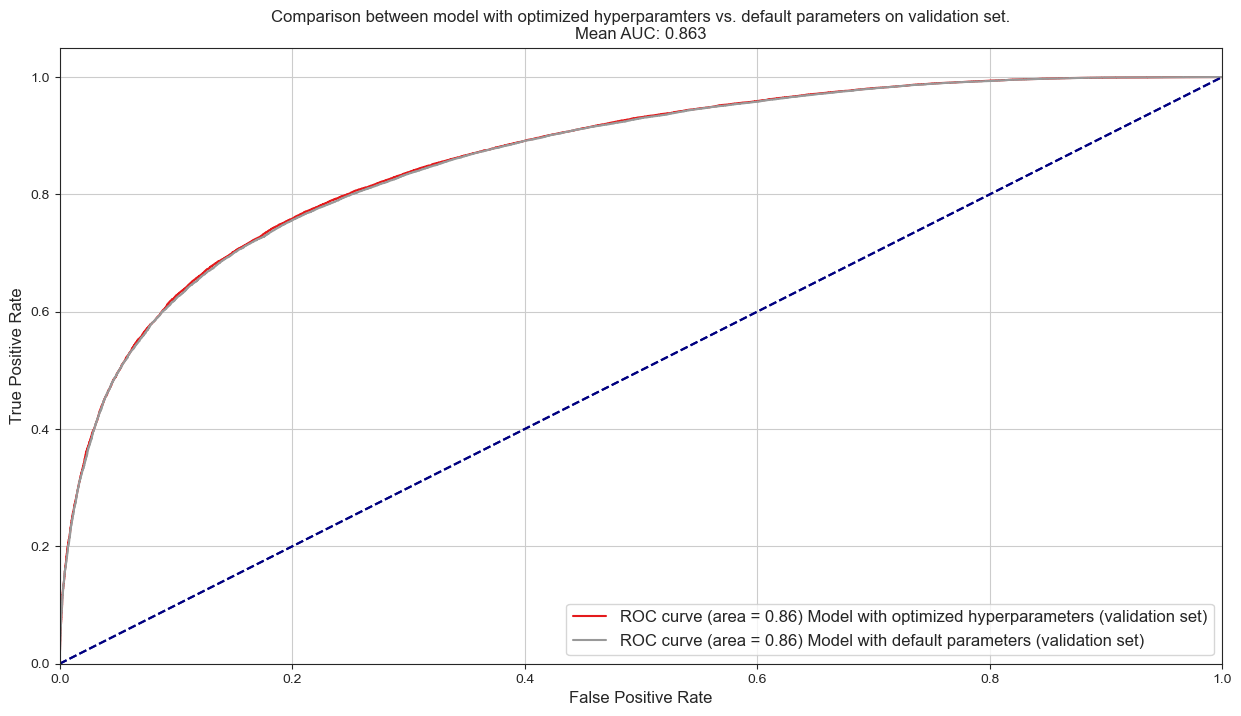

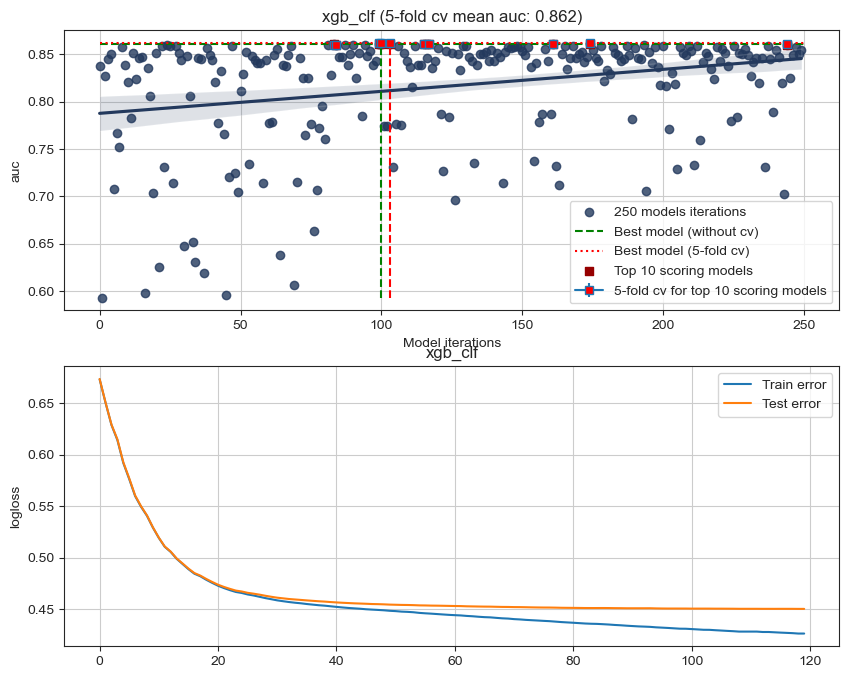

In [24]:
hgb.plot(figsize=(10,8))

In [25]:
results['params']

{'colsample_bytree': 0.81,
 'gamma': 0.5,
 'learning_rate': 0.10722630379858336,
 'max_depth': 8,
 'min_child_weight': 7.0,
 'n_estimators': 120,
 'scale_pos_weight': 1,
 'subsample': 0.93}

### Performance du modèle XGBClassifier

In [26]:
import xgboost as xgb

In [30]:
# On repart de nos données déjà splitées importées au début du notebook

xgb_cl = xgb.XGBClassifier(booster="gbtree",
                           objective="binary:logistic",
                           verbosity=0,
                           random_state=2023,
                           colsample_bytree=results['params']['colsample_bytree'],
                           gamma=results['params']['gamma'],
                           learning_rate=results['params']['learning_rate'],
                           max_depth=results['params']['max_depth'],
                           min_child_weight=results['params']['min_child_weight'],
                           n_estimators=results['params']['n_estimators'],
                           scale_pos_weight=results['params']['scale_pos_weight'],
                           subsample=results['params']['subsample'])

xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.81,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.10722630379858336,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=7.0,
              missing=nan, monotone_constraints='()', n_estimators=120,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=2023, ...)

In [31]:
# Sauvegarde du modèle
import pickle

pickle.dump(xgb_cl, open('./model_XGB.pkl', 'wb'))

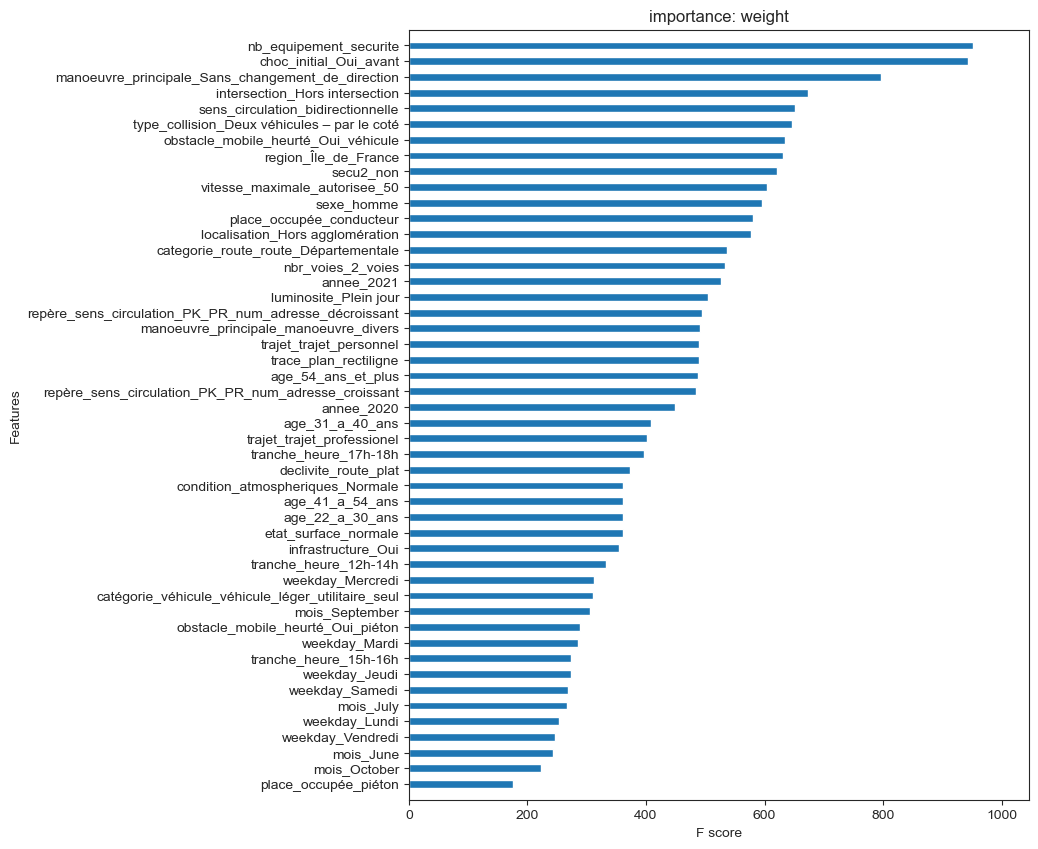

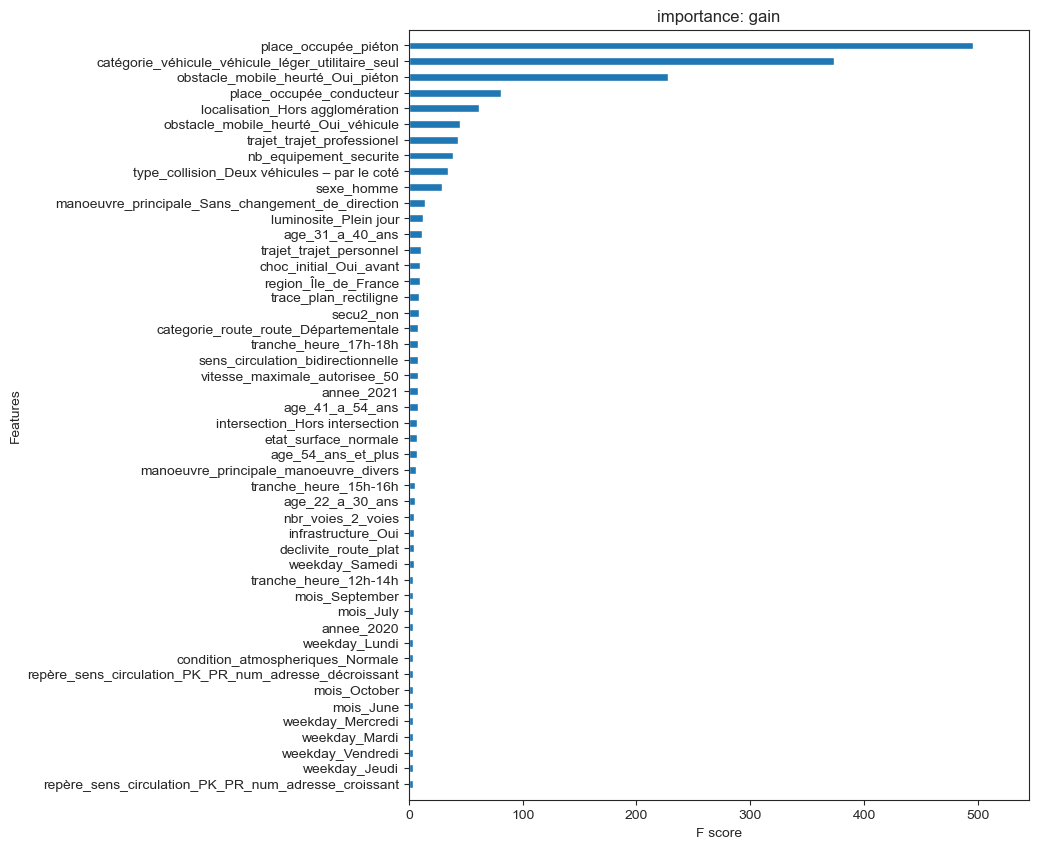

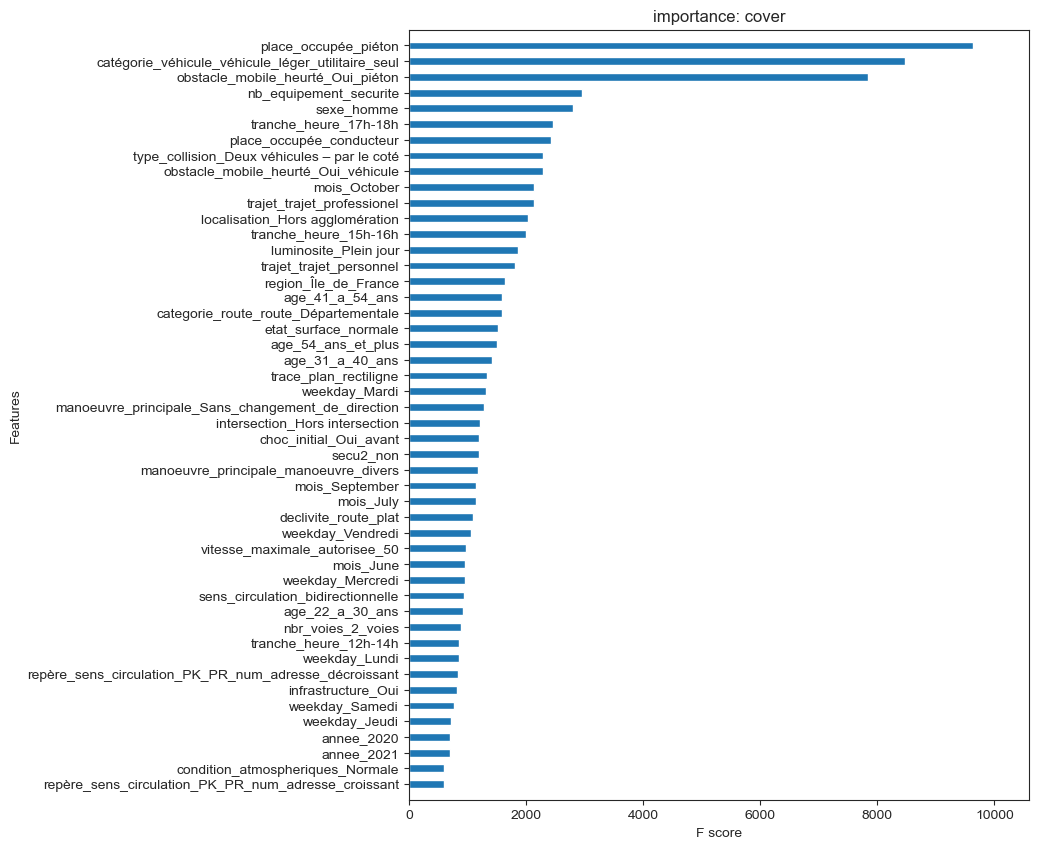

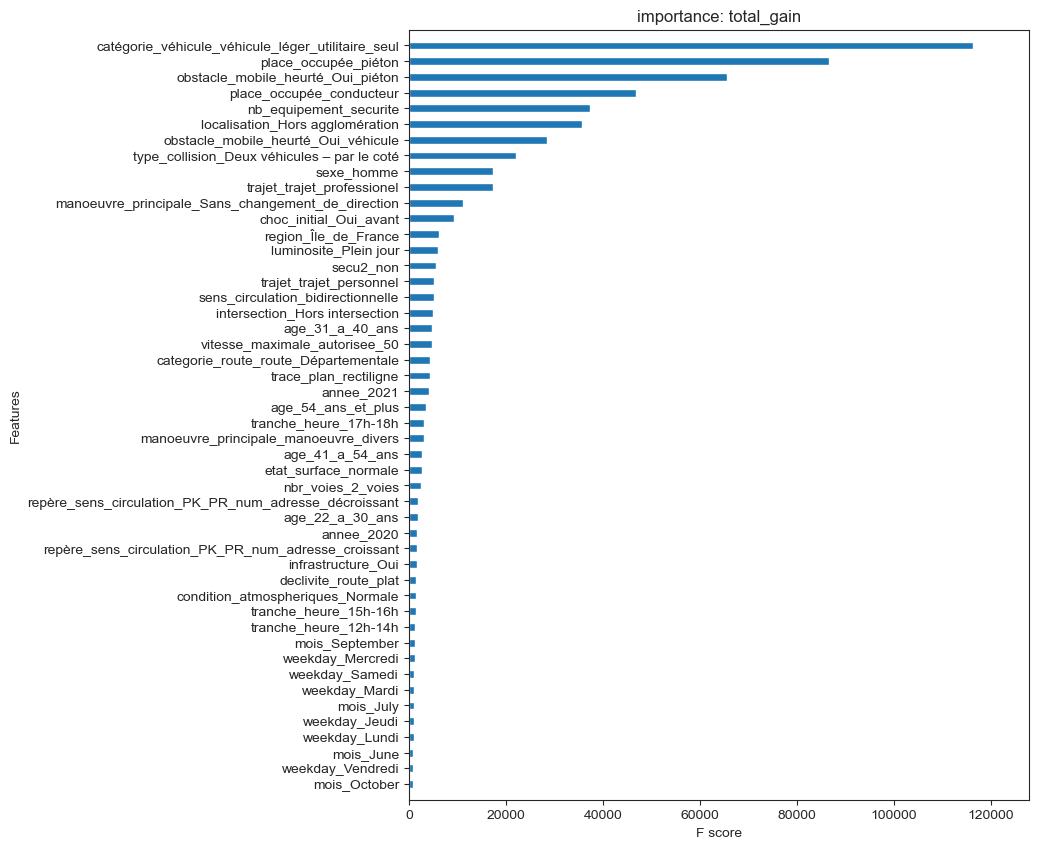

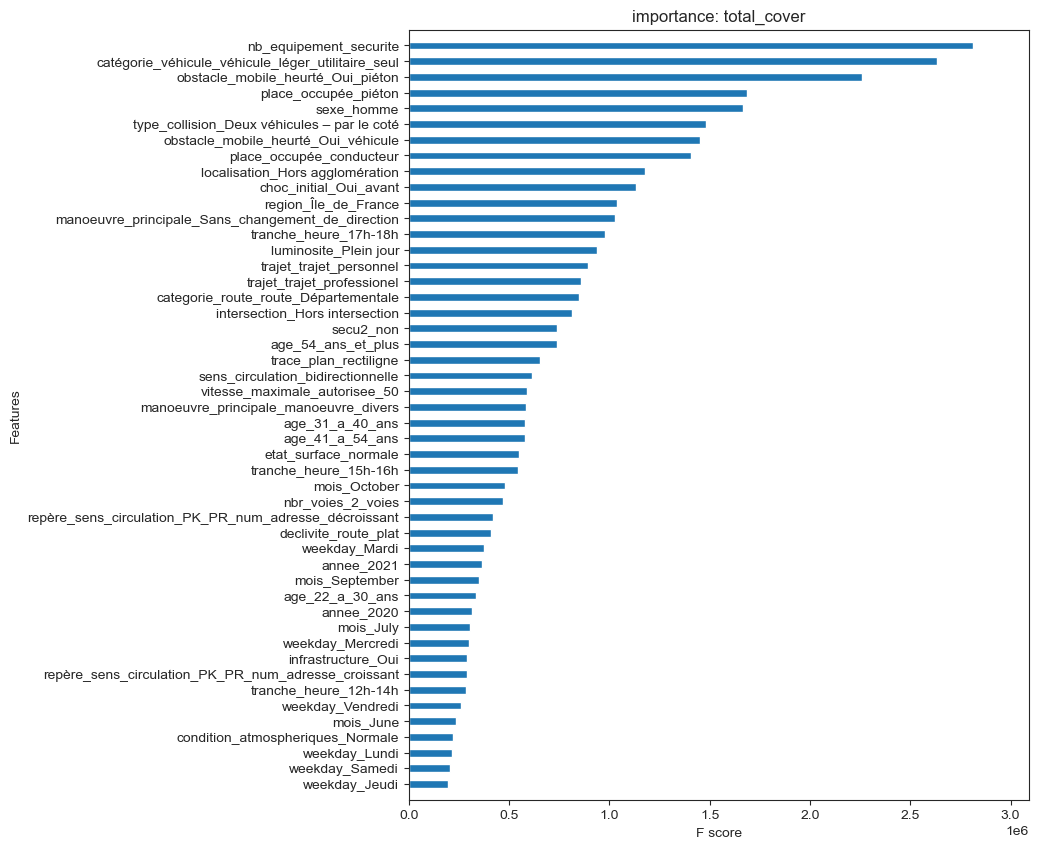

In [32]:
types= ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

for f in types: 
    _, axes = plt.subplots(figsize=(8, 10))
    xgb.plot_importance(xgb_cl, height=0.5, importance_type=f, show_values=False, grid=False, ax=axes, title='importance: '+f);

In [33]:
# Make predictions
y_pred_xgb = xgb_cl.predict(X_test)

y_pred_xgb_proba = xgb_cl.predict_proba(X_test)

In [34]:
y_pred_xgb_df = pd.DataFrame(y_pred_xgb, columns=[y_test])

In [35]:
print("Prédictions sur l'ensemble de test")
print(pd.DataFrame({
    "COUNT": y_pred_xgb_df.value_counts(),
    "RATIO": y_pred_xgb_df.value_counts() / len(y_pred_xgb_df) * 100}))

Prédictions sur l'ensemble de test
                     COUNT  RATIO
(gravite_accident,)              
1                    65459  60.05
0                    43542  39.95


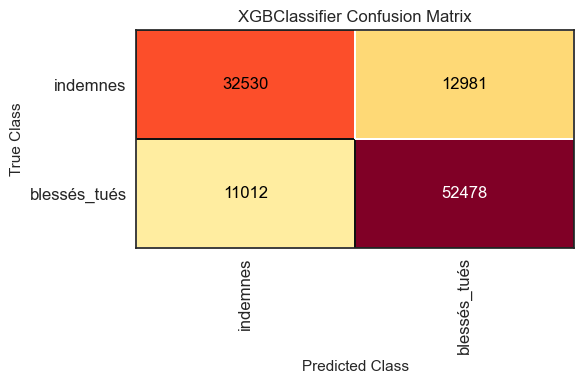

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [36]:
from yellowbrick.classifier import ConfusionMatrix

classes = ['indemnes', 'blessés_tués']

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

cm = ConfusionMatrix(xgb_cl, classes=classes)

cm.fit(X_train, y_train)        # Fit the visualizer and the model
cm.score(X_test, y_test)        # Evaluate the model on the test data
cm.show()

In [37]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     45511
           1       0.80      0.83      0.81     63490

    accuracy                           0.78    109001
   macro avg       0.77      0.77      0.77    109001
weighted avg       0.78      0.78      0.78    109001



In [38]:
print(f"Train Accuracy : {accuracy_score(y_train, xgb_cl.predict(X_train)):.2%}")
print(f"Test Accuracy : {accuracy_score(y_test, y_pred_xgb):.2%}")

Train Accuracy : 79.36%
Test Accuracy : 77.99%


In [39]:
print(f"Train Precision : {precision_score(y_train, xgb_cl.predict(X_train)):.2%}")
print(f"Test Precision : {precision_score(y_test, y_pred_xgb):.2%}")

Train Precision : 81.42%
Test Precision : 80.17%


In [41]:
print(f"Train Recall : {recall_score(y_train, xgb_cl.predict(X_train)):.2%}")
print(f"Test Recall : {recall_score(y_test, y_pred_xgb):.2%}")

Train Recall : 83.66%
Test Recall : 82.66%


In [42]:
print(f"Train f1_score : {f1_score(y_train, xgb_cl.predict(X_train)):.2%}")
print(f"Test f1_score : {f1_score(y_test, y_pred_xgb):.2%}")

Train f1_score : 82.52%
Test f1_score : 81.39%


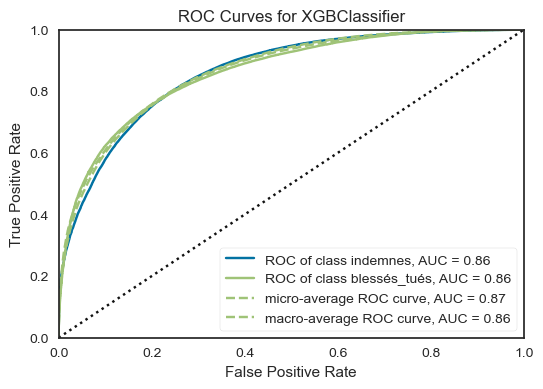

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
from yellowbrick.classifier import ROCAUC

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

vis_rocauc = ROCAUC(xgb_cl, classes=classes, random_state=101)

vis_rocauc.fit(X_train, y_train)        
vis_rocauc.score(X_test, y_test)
vis_rocauc.show() 

## LGBMClassifier Model Tuning

Optuna est un framework de réglage automatique d'hyperparamètres de nouvelle génération entièrement écrit en Python.

Ses caractéristiques les plus marquantes sont :

- la possibilité de définir des espaces de recherche Pythonic à l'aide de boucles et de conditions.
- API indépendante de la plate-forme - vous pouvez régler les estimateurs de presque tous les packages/frameworks ML, DL, y compris Sklearn, PyTorch, TensorFlow, Keras, XGBoost, LightGBM, CatBoost, etc.
- une large suite d'algorithmes d'optimisation avec des fonctionnalités d'arrêt et d'élagage précoces intégrées.
- Parallélisation facile avec peu ou pas de modifications du code.
- Prise en charge intégrée pour l'exploration visuelle des résultats de recherche.

Le processus d'optimisation dans Optuna nécessite une fonction appelée objectif qui :

- inclut la grille de paramètres pour effectuer une recherche sous forme de dictionnaire
- crée un modèle pour essayer des ensembles de combinaisons d'hyperparamètres
- adapte le modèle aux données avec un seul ensemble de candidats
- génère des prédictions à l'aide de ce modèle
- note les prédictions en fonction de métriques définies par l'utilisateur et les renvoie


Avec Optima, Nous pouvons reprendre l'optimisation même après qu'elle soit terminée si nous ne sommes pas satisfaits des résultats !
C'est un net avantage par rapport à d'autres outils similaires car une fois la recherche effectuée, ils oublient complètement l'historique des essais précédents. Optuna ne le fait pas !
Pour continuer la recherche, appelez optimize à nouveau avec les paramètres souhaités.

Dans Optuna, l'ensemble du processus d'optimisation s'appelle une étude : study = `optuna.create_study()`
Une étude a besoin d'une fonction qu'elle peut optimiser. Typiquement, cette fonction est définie par l'utilisateur et doit être nommée `objective`.
Elle doit accepter un `optuna.Trial` objet en tant que paramètre et renvoyer la métrique que nous voulons optimiser.

Si la métrique que nous voulons optimiser est un score de performance en points comme le ROC AUC ou la précision, nous définissons la direction sur `maximize`. Sinon, nous minimisons une fonction de perte telle que RMSE, RMSLE, perte de journal, etc. en définissant la direction sur `minimize`.

### Optimisation des hyperparamètres du modèle LGBMClassifier

In [44]:
import optuna
from optuna import Trial, visualization

In [45]:
import lightgbm as lgb

def objective(trial):
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)
        
    
    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": 0,
        "boosting_type": "gbdt",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-7, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12, step=2),
        "num_leaves": trial.suggest_int("num_leaves", 3, 12, step=2),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.8 , step=1)
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])

    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [46]:
%%time

# Create study that minimizes
study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize")

study.optimize(objective, n_trials=300)

[I 2023-02-21 02:34:34,028] A new study created in memory with name: no-name-477139a1-216b-49c7-b1ac-c71346fa9c5b


[LightGBM] [Warning] feature_fraction is set=0.5184063253751623, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5184063253751623
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=90 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5184063253751623, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5184063253751623
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=90 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.5184063253751623, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:34:43,751] Trial 0 finished with value: 0.5824717204429317 and parameters: {'n_estimators': 1000, 'learning_rate': 2.9064160147190053e-07, 'max_depth': 11, 'num_leaves': 3, 'min_data_in_leaf': 4000, 'min_child_samples': 90, 'lambda_l1': 1.6698843507984828e-08, 'lambda_l2': 1.705674357714256e-05, 'min_gain_to_split': 5.235883083123676, 'feature_fraction': 0.5184063253751623, 'bagging_fraction': 0.6740709269817178, 'bagging_freq': 6, 'colsample_bytree': 0.3}. Best is trial 0 with value: 0.5824717204429317.


[LightGBM] [Warning] feature_fraction is set=0.4160208665930465, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.4160208665930465
[LightGBM] [Warning] min_data_in_leaf is set=8500, min_child_samples=78 will be ignored. Current value: min_data_in_leaf=8500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4160208665930465, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.4160208665930465
[LightGBM] [Warning] min_data_in_leaf is set=8500, min_child_samples=78 will be ignored. Current value: min_data_in_leaf=8500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.4160208665930465, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:34:45,694] Trial 1 finished with value: 0.5824717204429317 and parameters: {'n_estimators': 100, 'learning_rate': 7.63960516100242e-06, 'max_depth': 9, 'num_leaves': 9, 'min_data_in_leaf': 8500, 'min_child_samples': 78, 'lambda_l1': 1.1879760641335088e-07, 'lambda_l2': 6.849400615888013, 'min_gain_to_split': 11.88732226551768, 'feature_fraction': 0.4160208665930465, 'bagging_fraction': 0.875510416103896, 'bagging_freq': 5, 'colsample_bytree': 0.3}. Best is trial 0 with value: 0.5824717204429317.


[LightGBM] [Warning] feature_fraction is set=0.8248484086067349, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8248484086067349
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8248484086067349, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8248484086067349
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8248484086067349, colsample_bytree=0.3 will be ignored. Current value: feature_fra

[I 2023-02-21 02:34:49,936] Trial 2 finished with value: 0.7587178099283493 and parameters: {'n_estimators': 400, 'learning_rate': 0.016757045412187366, 'max_depth': 7, 'num_leaves': 5, 'min_data_in_leaf': 6400, 'min_child_samples': 100, 'lambda_l1': 1.7570541833208007, 'lambda_l2': 0.021984611229768233, 'min_gain_to_split': 12.410272185293515, 'feature_fraction': 0.8248484086067349, 'bagging_fraction': 0.6645423968690944, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 2 with value: 0.7587178099283493.


[LightGBM] [Warning] feature_fraction is set=0.7619067316879382, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7619067316879382
[LightGBM] [Warning] min_data_in_leaf is set=7100, min_child_samples=90 will be ignored. Current value: min_data_in_leaf=7100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7619067316879382, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7619067316879382
[LightGBM] [Warning] min_data_in_leaf is set=7100, min_child_samples=90 will be ignored. Current value: min_data_in_leaf=7100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.7619067316879382, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-02-21 02:34:53,706] Trial 3 finished with value: 0.757112320070458 and parameters: {'n_estimators': 300, 'learning_rate': 0.013674081538815459, 'max_depth': 3, 'num_leaves': 7, 'min_data_in_leaf': 7100, 'min_child_samples': 90, 'lambda_l1': 5.3712440203588145e-06, 'lambda_l2': 5.690915171352791e-07, 'min_gain_to_split': 14.476233378137367, 'feature_fraction': 0.7619067316879382, 'bagging_fraction': 0.8916708606483263, 'bagging_freq': 5, 'colsample_bytree': 0.3}. Best is trial 2 with value: 0.7587178099283493.


[LightGBM] [Warning] feature_fraction is set=0.7084639863056467, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7084639863056467
[LightGBM] [Warning] min_data_in_leaf is set=8700, min_child_samples=68 will be ignored. Current value: min_data_in_leaf=8700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7084639863056467, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7084639863056467
[LightGBM] [Warning] min_data_in_leaf is set=8700, min_child_samples=68 will be ignored. Current value: min_data_in_leaf=8700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.7084639863056467, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:35:05,733] Trial 4 finished with value: 0.759681103843084 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04466344295537873, 'max_depth': 5, 'num_leaves': 5, 'min_data_in_leaf': 8700, 'min_child_samples': 68, 'lambda_l1': 1.6213496622624655, 'lambda_l2': 0.5940199615872418, 'min_gain_to_split': 8.829816172033006, 'feature_fraction': 0.7084639863056467, 'bagging_fraction': 0.7818716850329956, 'bagging_freq': 4, 'colsample_bytree': 0.3}. Best is trial 4 with value: 0.759681103843084.


[LightGBM] [Warning] feature_fraction is set=0.43431811485068816, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.43431811485068816
[LightGBM] [Warning] min_data_in_leaf is set=9800, min_child_samples=38 will be ignored. Current value: min_data_in_leaf=9800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.43431811485068816, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.43431811485068816
[LightGBM] [Warning] min_data_in_leaf is set=9800, min_child_samples=38 will be ignored. Current value: min_data_in_leaf=9800


[I 2023-02-21 02:35:06,215] Trial 5 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.43431811485068816, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.43431811485068816
[LightGBM] [Warning] min_data_in_leaf is set=9800, min_child_samples=38 will be ignored. Current value: min_data_in_leaf=9800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4025053821852083, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.4025053821852083
[LightGBM] [Warning] min_data_in_leaf is set=9200, min_child_samples=56 will be ignored. Current value: min_data_in_leaf=9200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.40

[I 2023-02-21 02:35:08,525] Trial 6 finished with value: 0.5824717204429317 and parameters: {'n_estimators': 100, 'learning_rate': 1.1993594655645153e-05, 'max_depth': 11, 'num_leaves': 9, 'min_data_in_leaf': 9200, 'min_child_samples': 56, 'lambda_l1': 2.6190452121862303e-08, 'lambda_l2': 4.760294273057901e-06, 'min_gain_to_split': 11.125884273311156, 'feature_fraction': 0.4025053821852083, 'bagging_fraction': 0.7174783110779714, 'bagging_freq': 7, 'colsample_bytree': 0.3}. Best is trial 4 with value: 0.759681103843084.


[LightGBM] [Warning] feature_fraction is set=0.4625258315265132, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.4625258315265132
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=88 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4625258315265132, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.4625258315265132
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=88 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.4625258315265132, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:35:11,456] Trial 7 pruned. Trial was pruned at iteration 151.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7121665882634033, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7121665882634033
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=88 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7121665882634033, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7121665882634033
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=88 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:35:15,582] Trial 8 finished with value: 0.7679562572820433 and parameters: {'n_estimators': 300, 'learning_rate': 0.0939302673479655, 'max_depth': 11, 'num_leaves': 9, 'min_data_in_leaf': 400, 'min_child_samples': 88, 'lambda_l1': 0.3818932506202613, 'lambda_l2': 6.368748091962546e-07, 'min_gain_to_split': 2.2558391750604474, 'feature_fraction': 0.7121665882634033, 'bagging_fraction': 0.6448585579681154, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 8 with value: 0.7679562572820433.


[LightGBM] [Warning] feature_fraction is set=0.5643604036918817, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5643604036918817
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=27 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5643604036918817, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5643604036918817
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=27 will be ignored. Current value: min_data_in_leaf=1500


[I 2023-02-21 02:35:16,093] Trial 9 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.5643604036918817, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5643604036918817
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=27 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-02-21 02:35:26,277] Trial 10 finished with value: 0.7763323272263557 and parameters: {'n_estimators': 700, 'learning_rate': 0.17363500189531747, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 300, 'min_child_samples': 5, 'lambda_l1': 0.002267896311530068, 'lambda_l2': 2.8762854896962278e-08, 'min_gain_to_split': 0.1031513615389743, 'feature_fraction': 0.9737350016601681, 'bagging_fraction': 0.9659289724158286, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 10 with value: 0.7763323272263557.


[LightGBM] [Warning] feature_fraction is set=0.9916588364702906, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9916588364702906
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9916588364702906, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9916588364702906
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9916588364702906, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[I 2023-02-21 02:35:35,629] Trial 11 finished with value: 0.7742130806139393 and parameters: {'n_estimators': 700, 'learning_rate': 0.06944318035101342, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 200, 'min_child_samples': 7, 'lambda_l1': 0.0022267279736928776, 'lambda_l2': 1.6306487683902763e-08, 'min_gain_to_split': 0.13828342688046094, 'feature_fraction': 0.9916588364702906, 'bagging_fraction': 0.9912885408065875, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 10 with value: 0.7763323272263557.


[LightGBM] [Warning] feature_fraction is set=0.9825053526323136, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9825053526323136
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9825053526323136, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9825053526323136
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9825053526323136, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2023-02-21 02:35:44,845] Trial 12 finished with value: 0.775029586884524 and parameters: {'n_estimators': 700, 'learning_rate': 0.27523764997394995, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 2600, 'min_child_samples': 6, 'lambda_l1': 0.0016127330063741103, 'lambda_l2': 1.111748243836224e-08, 'min_gain_to_split': 0.10468574062677938, 'feature_fraction': 0.9825053526323136, 'bagging_fraction': 0.9806581784951144, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 10 with value: 0.7763323272263557.


[LightGBM] [Warning] feature_fraction is set=0.9945358207597879, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9945358207597879
[LightGBM] [Warning] min_data_in_leaf is set=2900, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9945358207597879, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9945358207597879
[LightGBM] [Warning] min_data_in_leaf is set=2900, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9945358207597879, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:35:49,771] Trial 13 pruned. Trial was pruned at iteration 400.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:35:51,333] Trial 14 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9122879543423378, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9122879543423378
[LightGBM] [Warning] min_data_in_leaf is set=4600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9122879543423378, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9122879543423378
[LightGBM] [Warning] min_data_in_leaf is set=4600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9122879543423378, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:35:55,142] Trial 15 pruned. Trial was pruned at iteration 300.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:35:56,978] Trial 16 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.8230546477578794, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8230546477578794
[LightGBM] [Warning] min_data_in_leaf is set=3600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=3600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8230546477578794, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8230546477578794
[LightGBM] [Warning] min_data_in_leaf is set=3600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=3600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8230546477578794, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:35:58,215] Trial 17 pruned. Trial was pruned at iteration 75.


[LightGBM] [Warning] feature_fraction is set=0.9677889660208044, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9677889660208044
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9677889660208044, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9677889660208044
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9677889660208044, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:35:58,834] Trial 18 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.6224066325303522, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.6224066325303522
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=52 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6224066325303522, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.6224066325303522
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=52 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.6224066325303522, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:36:04,012] Trial 19 pruned. Trial was pruned at iteration 400.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.8461236000719019, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8461236000719019
[LightGBM] [Warning] min_data_in_leaf is set=3500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=3500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8461236000719019, colsample_bytree=0.3 will be ignored. C

[I 2023-02-21 02:36:05,923] Trial 20 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9847763848590234, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9847763848590234
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9847763848590234, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9847763848590234
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9847763848590234, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves 

[I 2023-02-21 02:36:15,684] Trial 21 finished with value: 0.7738002403647672 and parameters: {'n_estimators': 700, 'learning_rate': 0.05274683554905992, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 200, 'min_child_samples': 14, 'lambda_l1': 0.0023268006962673072, 'lambda_l2': 1.6309786389446935e-08, 'min_gain_to_split': 0.17675073445638248, 'feature_fraction': 0.9847763848590234, 'bagging_fraction': 0.9680652435299973, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 10 with value: 0.7763323272263557.


[LightGBM] [Warning] feature_fraction is set=0.9488119024534482, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9488119024534482
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9488119024534482, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9488119024534482
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9488119024534482, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:36:19,586] Trial 22 pruned. Trial was pruned at iteration 300.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:36:20,202] Trial 23 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9958523920859692, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9958523920859692
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9958523920859692, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9958523920859692
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9958523920859692, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[I 2023-02-21 02:36:23,733] Trial 24 pruned. Trial was pruned at iteration 300.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.8821125064258527, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8821125064258527
[LightGBM] [Warning] min_data_in_leaf is set=2800, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8821125064258527, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8821125064258527
[LightGBM] [Warning] min_data_in_leaf is set=2800, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2800
[L

[I 2023-02-21 02:36:25,637] Trial 25 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9492021816392475, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9492021816392475
[LightGBM] [Warning] min_data_in_leaf is set=5600, min_child_samples=26 will be ignored. Current value: min_data_in_leaf=5600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9492021816392475, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9492021816392475
[LightGBM] [Warning] min_data_in_leaf is set=5600, min_child_samples=26 will be ignored. Current value: min_data_in_leaf=5600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9492021816392475, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:27,201] Trial 26 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9974247121863885, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9974247121863885
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9974247121863885, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9974247121863885
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9974247121863885, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:27,794] Trial 27 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8572096140545278, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8572096140545278
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8572096140545278, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8572096140545278
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8572096140545278, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:34,081] Trial 28 finished with value: 0.7758369189273493 and parameters: {'n_estimators': 400, 'learning_rate': 0.10393304535989714, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1800, 'min_child_samples': 16, 'lambda_l1': 8.596814553423276e-05, 'lambda_l2': 9.618676027556663e-07, 'min_gain_to_split': 0.08429054976288627, 'feature_fraction': 0.8572096140545278, 'bagging_fraction': 0.9569793233282538, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 10 with value: 0.7763323272263557.


[LightGBM] [Warning] feature_fraction is set=0.931404470931323, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.931404470931323
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.931404470931323, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.931404470931323
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.931404470931323, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0

[I 2023-02-21 02:36:34,706] Trial 29 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8735875844261637, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8735875844261637
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8735875844261637, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8735875844261637
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8735875844261637, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:35,343] Trial 30 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9368322204622039, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9368322204622039
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9368322204622039, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9368322204622039
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9368322204622039, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[I 2023-02-21 02:36:39,292] Trial 31 pruned. Trial was pruned at iteration 300.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.9679812500759206, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9679812500759206
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9679812500759206, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9679812500759206
[LightGBM] [Warning] min_data_in_leaf is set=1600, mi

[I 2023-02-21 02:36:40,915] Trial 32 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.8625001379659136, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8625001379659136
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8625001379659136, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8625001379659136
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8625001379659136, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:43,042] Trial 33 pruned. Trial was pruned at iteration 141.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:36:45,058] Trial 34 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9155130226335538, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9155130226335538
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=23 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9155130226335538, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9155130226335538
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=23 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9155130226335538, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:36:46,657] Trial 35 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.8670628562013256, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8670628562013256
[LightGBM] [Warning] min_data_in_leaf is set=4600, min_child_samples=70 will be ignored. Current value: min_data_in_leaf=4600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8670628562013256, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8670628562013256
[LightGBM] [Warning] min_data_in_leaf is set=4600, min_child_samples=70 will be ignored. Current value: min_data_in_leaf=4600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8670628562013256, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:48,576] Trial 36 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9616069939206322, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9616069939206322
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=44 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9616069939206322, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9616069939206322
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=44 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9616069939206322, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:50,358] Trial 37 pruned. Trial was pruned at iteration 104.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:36:51,059] Trial 38 pruned. Trial was pruned at iteration 20.


[LightGBM] [Warning] feature_fraction is set=0.8011144434576231, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8011144434576231
[LightGBM] [Warning] min_data_in_leaf is set=7100, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=7100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8011144434576231, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8011144434576231
[LightGBM] [Warning] min_data_in_leaf is set=7100, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=7100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8011144434576231, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:36:52,739] Trial 39 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9306080001770985, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9306080001770985
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=36 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9306080001770985, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9306080001770985
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=36 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9306080001770985, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:36:53,345] Trial 40 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9990741577319404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990741577319404
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9990741577319404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990741577319404
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9990741577319404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:37:03,630] Trial 41 finished with value: 0.7759837065714994 and parameters: {'n_estimators': 700, 'learning_rate': 0.057960312210540155, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 300, 'min_child_samples': 12, 'lambda_l1': 0.002670454935696029, 'lambda_l2': 1.980366876193324e-08, 'min_gain_to_split': 0.04025101604079332, 'feature_fraction': 0.9990741577319404, 'bagging_fraction': 0.9696397065151595, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 10 with value: 0.7763323272263557.


[LightGBM] [Warning] feature_fraction is set=0.97643036993638, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.97643036993638
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.97643036993638, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.97643036993638
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.97643036993638, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9764303699

[I 2023-02-21 02:37:06,371] Trial 42 pruned. Trial was pruned at iteration 197.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2023-02-21 02:37:08,833] Trial 43 pruned. Trial was pruned at iteration 138.


[LightGBM] [Warning] feature_fraction is set=0.9959352153503331, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9959352153503331
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=24 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9959352153503331, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9959352153503331
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=24 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:37:09,379] Trial 44 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9959352153503331, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9959352153503331
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=24 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9197326702929975, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9197326702929975
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=60 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9197326702929975, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9197326702929975
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=60 will be ignored. Current value: min_data_in_leaf=700
[Lig

[I 2023-02-21 02:37:11,562] Trial 45 pruned. Trial was pruned at iteration 128.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.8895856646370337, colsample_bytree=0.3 will be ignored. Cu

[I 2023-02-21 02:37:12,198] Trial 46 pruned. Trial was pruned at iteration 14.


[LightGBM] [Warning] feature_fraction is set=0.9545103716936609, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9545103716936609
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9545103716936609, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9545103716936609
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9545103716936609, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:37:12,793] Trial 47 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9706065552571036, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9706065552571036
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=99 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9706065552571036, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9706065552571036
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=99 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9706065552571036, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:37:14,392] Trial 48 pruned. Trial was pruned at iteration 78.


[LightGBM] [Warning] feature_fraction is set=0.9223160984441396, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9223160984441396
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9223160984441396, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9223160984441396
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9223160984441396, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:37:16,627] Trial 49 pruned. Trial was pruned at iteration 142.


[LightGBM] [Warning] feature_fraction is set=0.8941983410007621, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8941983410007621
[LightGBM] [Warning] min_data_in_leaf is set=4100, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=4100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8941983410007621, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8941983410007621
[LightGBM] [Warning] min_data_in_leaf is set=4100, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=4100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:37:17,235] Trial 50 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8941983410007621, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8941983410007621
[LightGBM] [Warning] min_data_in_leaf is set=4100, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=4100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.980607687223365, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.980607687223365
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.980607687223365, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.980607687223365
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1000
[Lig

[I 2023-02-21 02:37:17,815] Trial 51 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9824773531205813, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9824773531205813
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9824773531205813, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9824773531205813
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:37:18,397] Trial 52 pruned. Trial was pruned at iteration 12.


[LightGBM] [Warning] feature_fraction is set=0.9824773531205813, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9824773531205813
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9949756072550469, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9949756072550469
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9949756072550469, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9949756072550469
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[Ligh

[I 2023-02-21 02:37:29,899] Trial 53 finished with value: 0.7781946954615095 and parameters: {'n_estimators': 800, 'learning_rate': 0.19247503728684026, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 1400, 'min_child_samples': 8, 'lambda_l1': 0.00022639172604888052, 'lambda_l2': 9.417446252495322e-08, 'min_gain_to_split': 0.02797546058020383, 'feature_fraction': 0.9949756072550469, 'bagging_fraction': 0.9825375349206911, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 53 with value: 0.7781946954615095.


[LightGBM] [Warning] feature_fraction is set=0.9976403873856209, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9976403873856209
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9976403873856209, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9976403873856209
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9976403873856209, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:37:31,835] Trial 54 pruned. Trial was pruned at iteration 116.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:37:33,599] Trial 55 pruned. Trial was pruned at iteration 109.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves 

[I 2023-02-21 02:37:35,182] Trial 56 pruned. Trial was pruned at iteration 69.


[LightGBM] [Warning] feature_fraction is set=0.9122742604603963, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9122742604603963
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9122742604603963, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9122742604603963
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9122742604603963, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:37:37,163] Trial 57 pruned. Trial was pruned at iteration 130.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[I 2023-02-21 02:37:37,696] Trial 58 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.964524387157724, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.964524387157724
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=19 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9363298991009009, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9363298991009009
[LightGBM] [Warning] min_data_in_leaf is set=5600, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=5600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9363298991009009, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9363298991009009
[LightGBM] [Warning] min_data_in_leaf is set=5600, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=5600
[Lig

[I 2023-02-21 02:37:38,313] Trial 59 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9363298991009009, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9363298991009009
[LightGBM] [Warning] min_data_in_leaf is set=5600, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=5600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9946969768692792, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9946969768692792
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9946969768692792, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9946969768692792
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1900
[L

[I 2023-02-21 02:37:50,809] Trial 60 finished with value: 0.7783598315611784 and parameters: {'n_estimators': 900, 'learning_rate': 0.20398435199594223, 'max_depth': 7, 'num_leaves': 9, 'min_data_in_leaf': 1900, 'min_child_samples': 5, 'lambda_l1': 0.025807386122400383, 'lambda_l2': 2.6723034596963256e-08, 'min_gain_to_split': 0.00868830397437495, 'feature_fraction': 0.9946969768692792, 'bagging_fraction': 0.8590916690165132, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 60 with value: 0.7783598315611784.


[LightGBM] [Warning] feature_fraction is set=0.9874438523092537, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9874438523092537
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9874438523092537, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9874438523092537
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9874438523092537, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:38:03,647] Trial 61 finished with value: 0.7784607480665315 and parameters: {'n_estimators': 900, 'learning_rate': 0.18119980774119268, 'max_depth': 7, 'num_leaves': 9, 'min_data_in_leaf': 1000, 'min_child_samples': 5, 'lambda_l1': 0.023531169136364462, 'lambda_l2': 4.067663731792466e-08, 'min_gain_to_split': 0.026670726148425722, 'feature_fraction': 0.9874438523092537, 'bagging_fraction': 0.9772734806767586, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.977510568142319, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.977510568142319
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.977510568142319, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.977510568142319
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.977510568142319, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9

[I 2023-02-21 02:38:05,296] Trial 62 pruned. Trial was pruned at iteration 102.


[LightGBM] [Warning] feature_fraction is set=0.9909541957330895, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9909541957330895
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9909541957330895, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9909541957330895
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:38:05,871] Trial 63 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9909541957330895, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9909541957330895
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9992417319678846, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9992417319678846
[LightGBM] [Warning] min_data_in_leaf is set=9900, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=9900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9992417319678846, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9992417319678846
[LightGBM] [Warning] min_data_in_leaf is set=9900, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=9900
[L

[I 2023-02-21 02:38:06,884] Trial 64 pruned. Trial was pruned at iteration 49.


[LightGBM] [Warning] feature_fraction is set=0.9526998498906392, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9526998498906392
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9526998498906392, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9526998498906392
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9526998498906392, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:38:08,549] Trial 65 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9060036224530504, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9060036224530504
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=26 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9060036224530504, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9060036224530504
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=26 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9060036224530504, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:38:09,176] Trial 66 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9241688417735312, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9241688417735312
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9241688417735312, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9241688417735312
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9241688417735312, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:38:10,912] Trial 67 pruned. Trial was pruned at iteration 113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[I 2023-02-21 02:38:12,653] Trial 68 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:38:13,242] Trial 69 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9604910527632646, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9604910527632646
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9604910527632646, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9604910527632646
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=3000


[I 2023-02-21 02:38:13,814] Trial 70 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9604910527632646, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9604910527632646
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9826554555984832, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9826554555984832
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.982655

[I 2023-02-21 02:38:14,391] Trial 71 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9826554555984832, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9826554555984832
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9968988561027429, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9968988561027429
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9968988561027429, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9968988561027429
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1000
[Lig

[I 2023-02-21 02:38:16,465] Trial 72 pruned. Trial was pruned at iteration 127.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.9604477946753743, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9604477946753743
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9604477946753743, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9604477946753743
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choos

[I 2023-02-21 02:38:17,027] Trial 73 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9353289226313036, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9353289226313036
[LightGBM] [Warning] min_data_in_leaf is set=3500, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=3500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9353289226313036, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9353289226313036
[LightGBM] [Warning] min_data_in_leaf is set=3500, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=3500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9353289226313036, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:38:18,841] Trial 74 pruned. Trial was pruned at iteration 110.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.9709491511263665, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9709491511263665
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9709491511263665, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9709491511263665
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Auto-choos

[I 2023-02-21 02:38:19,483] Trial 75 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9506557800816986, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9506557800816986
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9506557800816986, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9506557800816986
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9506557800816986, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:38:20,086] Trial 76 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8857197344877431, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8857197344877431
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=42 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8857197344877431, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8857197344877431
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=42 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8857197344877431, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:38:21,852] Trial 77 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9852440160905119, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9852440160905119
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9852440160905119, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9852440160905119
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9852440160905119, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:38:22,478] Trial 78 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9997635574294752, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997635574294752
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=23 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9997635574294752, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997635574294752
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=23 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9997635574294752, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:38:23,125] Trial 79 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9160261067554548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9160261067554548
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9160261067554548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9160261067554548
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9160261067554548, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:38:27,164] Trial 80 finished with value: 0.7735984073540609 and parameters: {'n_estimators': 200, 'learning_rate': 0.14157177356774775, 'max_depth': 7, 'num_leaves': 9, 'min_data_in_leaf': 2500, 'min_child_samples': 5, 'lambda_l1': 0.005516125287478925, 'lambda_l2': 1.501157264448326e-08, 'min_gain_to_split': 0.027546001462883947, 'feature_fraction': 0.9160261067554548, 'bagging_fraction': 0.9310657522736466, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9797656965285308, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9797656965285308
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9797656965285308, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9797656965285308
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9797656965285308, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:38:29,505] Trial 81 pruned. Trial was pruned at iteration 141.


[LightGBM] [Warning] feature_fraction is set=0.9663592127884342, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9663592127884342
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9663592127884342, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9663592127884342
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:38:30,089] Trial 82 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9663592127884342, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9663592127884342
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9433973549872614, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9433973549872614
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9433973549872614, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9433973549872614
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=200
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:38:31,775] Trial 83 pruned. Trial was pruned at iteration 114.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:38:32,366] Trial 84 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9840229075019573, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9840229075019573
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9603191693042389, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9603191693042389
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9603191693042389, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9603191693042389
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1400
[Lig

[I 2023-02-21 02:38:33,026] Trial 85 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9997099053118679, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997099053118679
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9997099053118679, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997099053118679
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9997099053118679, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:38:42,649] Trial 86 finished with value: 0.7771763561802185 and parameters: {'n_estimators': 600, 'learning_rate': 0.1379023604440725, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 600, 'min_child_samples': 14, 'lambda_l1': 0.013856863601244825, 'lambda_l2': 1.400718209184612e-07, 'min_gain_to_split': 0.04219753120102489, 'feature_fraction': 0.9997099053118679, 'bagging_fraction': 0.98292934964097, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9332336975343098, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9332336975343098
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=57 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9332336975343098, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9332336975343098
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=57 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9332336975343098, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:38:44,685] Trial 87 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9871190659840613, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9871190659840613
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9871190659840613, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9871190659840613
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9871190659840613, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:38:46,888] Trial 88 finished with value: 0.7734332712543922 and parameters: {'n_estimators': 100, 'learning_rate': 0.17556360202524748, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 1900, 'min_child_samples': 15, 'lambda_l1': 0.008314648012234967, 'lambda_l2': 2.600946561336381e-07, 'min_gain_to_split': 0.018884272539408428, 'feature_fraction': 0.9871190659840613, 'bagging_fraction': 0.9852377402652689, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9990932257848983, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990932257848983
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9990932257848983, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990932257848983
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:38:47,460] Trial 89 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9990932257848983, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990932257848983
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9711282376075697, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9711282376075697
[LightGBM] [Warning] min_data_in_leaf is set=9400, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=9400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9711282376075697, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9711282376075697
[LightGBM] [Warning] min_data_in_leaf is set=9400, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=9400


[I 2023-02-21 02:38:48,929] Trial 90 pruned. Trial was pruned at iteration 69.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-02-21 02:38:51,212] Trial 91 pruned. Trial was pruned at iteration 150.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2023-02-21 02:38:52,970] Trial 92 pruned. Trial was pruned at iteration 103.


[LightGBM] [Warning] feature_fraction is set=0.971068407828026, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.971068407828026
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.971068407828026, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.971068407828026
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.971068407828026, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9

[I 2023-02-21 02:38:53,578] Trial 93 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9999346195537345, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999346195537345
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=66 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999346195537345, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999346195537345
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=66 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9999346195537345, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:38:54,249] Trial 94 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9239546185384339, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9239546185384339
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9239546185384339, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9239546185384339
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9239546185384339, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:38:56,649] Trial 95 pruned. Trial was pruned at iteration 141.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9414936975927778, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9414936975927778
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9414936975927778, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9414936975927778
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.941493697

[I 2023-02-21 02:38:57,231] Trial 96 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9548602554234316, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9548602554234316
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=29 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9548602554234316, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9548602554234316
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=29 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9548602554234316, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:38:59,014] Trial 97 pruned. Trial was pruned at iteration 98.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:38:59,592] Trial 98 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9000885630357695, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9000885630357695
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9836829064067067, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9836829064067067
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=19 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.983682

[I 2023-02-21 02:39:01,991] Trial 99 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9872374603758814, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9872374603758814
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9872374603758814, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9872374603758814
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9872374603758814, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:03,739] Trial 100 pruned. Trial was pruned at iteration 105.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-02-21 02:39:05,834] Trial 101 pruned. Trial was pruned at iteration 100.


[LightGBM] [Warning] feature_fraction is set=0.9701109196084035, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9701109196084035
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=47 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9701109196084035, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9701109196084035
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=47 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9701109196084035, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:07,941] Trial 102 pruned. Trial was pruned at iteration 99.


[LightGBM] [Warning] feature_fraction is set=0.9252497973835951, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9252497973835951
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9252497973835951, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9252497973835951
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2400


[I 2023-02-21 02:39:08,546] Trial 103 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9252497973835951, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9252497973835951
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9599874935660907, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9599874935660907
[LightGBM] [Warning] min_data_in_leaf is set=3300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=3300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.959987

[I 2023-02-21 02:39:10,175] Trial 104 pruned. Trial was pruned at iteration 92.


[LightGBM] [Warning] feature_fraction is set=0.9448035609936392, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9448035609936392
[LightGBM] [Warning] min_data_in_leaf is set=3800, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=3800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9448035609936392, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9448035609936392
[LightGBM] [Warning] min_data_in_leaf is set=3800, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=3800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9448035609936392, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:39:11,678] Trial 105 pruned. Trial was pruned at iteration 74.


[LightGBM] [Warning] feature_fraction is set=0.9886078427759762, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9886078427759762
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9886078427759762, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9886078427759762
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=2500


[I 2023-02-21 02:39:12,265] Trial 106 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9886078427759762, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9886078427759762
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9731586716098843, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9731586716098843
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.97315

[I 2023-02-21 02:39:12,893] Trial 107 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9731586716098843, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9731586716098843
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9147063823627644, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9147063823627644
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9147063823627644, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9147063823627644
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=400
[Ligh

[I 2023-02-21 02:39:14,739] Trial 108 pruned. Trial was pruned at iteration 116.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[I 2023-02-21 02:39:16,706] Trial 109 pruned. Trial was pruned at iteration 89.


[LightGBM] [Warning] feature_fraction is set=0.9884414494183773, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9884414494183773
[LightGBM] [Warning] min_data_in_leaf is set=4900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=4900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9884414494183773, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9884414494183773
[LightGBM] [Warning] min_data_in_leaf is set=4900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=4900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9884414494183773, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:17,305] Trial 110 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9889830469684283, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9889830469684283
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9889830469684283, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9889830469684283
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9889830469684283, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:19,644] Trial 111 finished with value: 0.7733231805212796 and parameters: {'n_estimators': 100, 'learning_rate': 0.17269123343366652, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 1900, 'min_child_samples': 16, 'lambda_l1': 0.008128798979595845, 'lambda_l2': 7.93596789249043e-08, 'min_gain_to_split': 0.050966225146311474, 'feature_fraction': 0.9889830469684283, 'bagging_fraction': 0.9879192269623321, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9773024587277188, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9773024587277188
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9773024587277188, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9773024587277188
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9773024587277188, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:21,684] Trial 112 finished with value: 0.7748461023293365 and parameters: {'n_estimators': 100, 'learning_rate': 0.2331670674136548, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 1700, 'min_child_samples': 11, 'lambda_l1': 0.014434237669397105, 'lambda_l2': 2.547301216851748e-07, 'min_gain_to_split': 0.014017175240385187, 'feature_fraction': 0.9773024587277188, 'bagging_fraction': 0.975767978617676, 'bagging_freq': 3, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9729500198824138, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9729500198824138
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9729500198824138, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9729500198824138
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:39:22,270] Trial 113 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9729500198824138, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9729500198824138
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9590837429367869, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9590837429367869
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9590837429367869, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9590837429367869
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=600
[Light

[I 2023-02-21 02:39:24,260] Trial 114 finished with value: 0.7724791515674169 and parameters: {'n_estimators': 100, 'learning_rate': 0.23447092111116782, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 600, 'min_child_samples': 5, 'lambda_l1': 0.014628967196024065, 'lambda_l2': 4.079443286176986e-08, 'min_gain_to_split': 0.5769557461442412, 'feature_fraction': 0.9590837429367869, 'bagging_fraction': 0.9523382226770308, 'bagging_freq': 3, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.9378693250290376, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9378693250290376
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9378693250290376, colsample_bytree=0.3 will be ignored. C

[I 2023-02-21 02:39:26,651] Trial 115 pruned. Trial was pruned at iteration 133.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9747063248469117, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9747063248469117
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=13 will be ignored. Current 

[I 2023-02-21 02:39:27,980] Trial 116 pruned. Trial was pruned at iteration 63.


[LightGBM] [Warning] feature_fraction is set=0.9994996529125476, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994996529125476
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9994996529125476, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994996529125476
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9994996529125476, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:28,670] Trial 117 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8784165890486532, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8784165890486532
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8784165890486532, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8784165890486532
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8784165890486532, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:39:29,498] Trial 118 pruned. Trial was pruned at iteration 23.


[LightGBM] [Warning] feature_fraction is set=0.9623911517319876, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9623911517319876
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9623911517319876, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9623911517319876
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=6400


[I 2023-02-21 02:39:30,105] Trial 119 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9623911517319876, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9623911517319876
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9263929315828404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9263929315828404
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.92639

[I 2023-02-21 02:39:30,698] Trial 120 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9263929315828404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9263929315828404
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9874650620147436, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9874650620147436
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9874650620147436, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9874650620147436
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=2000


[I 2023-02-21 02:39:32,958] Trial 121 finished with value: 0.7729103402721076 and parameters: {'n_estimators': 100, 'learning_rate': 0.18994532719519078, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 2000, 'min_child_samples': 15, 'lambda_l1': 0.009156544069908406, 'lambda_l2': 2.7712987983541e-07, 'min_gain_to_split': 0.20195664802357743, 'feature_fraction': 0.9874650620147436, 'bagging_fraction': 0.9888087085420018, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9791249723619481, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9791249723619481
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9791249723619481, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9791249723619481
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9791249723619481, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:34,905] Trial 122 pruned. Trial was pruned at iteration 93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9903135056177333, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9903135056177333
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9903135056177333, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9903135056177333
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading,

[I 2023-02-21 02:39:37,181] Trial 123 finished with value: 0.7753873817671397 and parameters: {'n_estimators': 100, 'learning_rate': 0.23734526842858117, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 1300, 'min_child_samples': 18, 'lambda_l1': 0.006748007231919524, 'lambda_l2': 5.828845149571336e-07, 'min_gain_to_split': 0.04039158460323536, 'feature_fraction': 0.9903135056177333, 'bagging_fraction': 0.9642641024270452, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9507435227624543, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9507435227624543
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9507435227624543, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9507435227624543
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9507435227624543, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:39:38,911] Trial 124 pruned. Trial was pruned at iteration 71.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.9988203254051972, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9988203254051972
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=500
[Light

[I 2023-02-21 02:39:39,567] Trial 125 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9652261165147994, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9652261165147994
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9652261165147994, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9652261165147994
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9652261165147994, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:39:40,189] Trial 126 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9794402065055196, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9794402065055196
[LightGBM] [Warning] min_data_in_leaf is set=8500, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=8500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9794402065055196, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9794402065055196
[LightGBM] [Warning] min_data_in_leaf is set=8500, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=8500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9794402065055196, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:40,879] Trial 127 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8600433835979735, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8600433835979735
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8600433835979735, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8600433835979735
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

[I 2023-02-21 02:39:42,408] Trial 128 pruned. Trial was pruned at iteration 61.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.9625737237689154, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9625737237689154
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=85 will be ignored. Current value: min_data_in_leaf=1500
[Lig

[I 2023-02-21 02:39:43,053] Trial 129 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9394225126627402, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9394225126627402
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9394225126627402, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9394225126627402
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9394225126627402, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:39:43,730] Trial 130 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9911436622646936, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9911436622646936
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9911436622646936, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9911436622646936
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9911436622646936, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:45,409] Trial 131 pruned. Trial was pruned at iteration 65.


[LightGBM] [Warning] feature_fraction is set=0.9876709871584006, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9876709871584006
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9876709871584006, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9876709871584006
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9876709871584006, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:48,357] Trial 132 finished with value: 0.7761580168989275 and parameters: {'n_estimators': 100, 'learning_rate': 0.29551381916458574, 'max_depth': 9, 'num_leaves': 11, 'min_data_in_leaf': 2500, 'min_child_samples': 15, 'lambda_l1': 0.005233239765729621, 'lambda_l2': 6.492831819147199e-07, 'min_gain_to_split': 0.015458079502203709, 'feature_fraction': 0.9876709871584006, 'bagging_fraction': 0.9488029518447086, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9753712502346054, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9753712502346054
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9753712502346054, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9753712502346054
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9753712502346054, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:49,936] Trial 133 pruned. Trial was pruned at iteration 68.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9900635738873369, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9900635738873369
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9900635738873369, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9900635738873369
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=12 will be ignored. Current value: min_data_i

[I 2023-02-21 02:39:51,075] Trial 134 pruned. Trial was pruned at iteration 12.


[LightGBM] [Warning] feature_fraction is set=0.9990903837427074, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990903837427074
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9990903837427074, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990903837427074
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9990903837427074, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:39:52,510] Trial 135 pruned. Trial was pruned at iteration 72.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9553314420714151, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9553314420714151
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9553314420714151, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9553314420714151
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

[I 2023-02-21 02:39:54,487] Trial 136 finished with value: 0.7734699681654297 and parameters: {'n_estimators': 100, 'learning_rate': 0.22786745809720843, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 2400, 'min_child_samples': 6, 'lambda_l1': 0.00016359266554599028, 'lambda_l2': 4.603619357617877e-07, 'min_gain_to_split': 0.07034566616045118, 'feature_fraction': 0.9553314420714151, 'bagging_fraction': 0.8909724062003369, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9742204189199041, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9742204189199041
[LightGBM] [Warning] min_data_in_leaf is set=3200, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=3200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9742204189199041, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9742204189199041
[LightGBM] [Warning] min_data_in_leaf is set=3200, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=3200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9742204189199041, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:39:55,106] Trial 137 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9684009412304034, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9684009412304034
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9684009412304034, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9684009412304034
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:39:55,684] Trial 138 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9684009412304034, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9684009412304034
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9997955796574988, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997955796574988
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9997955796574988, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997955796574988
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1700


[I 2023-02-21 02:39:56,436] Trial 139 pruned. Trial was pruned at iteration 20.


[LightGBM] [Warning] feature_fraction is set=0.9475814792275347, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9475814792275347
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=19 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9475814792275347, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9475814792275347
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=19 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:39:57,064] Trial 140 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9475814792275347, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9475814792275347
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=19 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.954260929726661, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.954260929726661
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.954260929726661, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.954260929726661
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2400
[LightGB

[I 2023-02-21 02:39:58,297] Trial 141 pruned. Trial was pruned at iteration 58.


[LightGBM] [Warning] feature_fraction is set=0.9800379480746981, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9800379480746981
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9800379480746981, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9800379480746981
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9800379480746981, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:00,206] Trial 142 finished with value: 0.7740387702865111 and parameters: {'n_estimators': 100, 'learning_rate': 0.185454717831415, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 2300, 'min_child_samples': 8, 'lambda_l1': 0.00012317123081792526, 'lambda_l2': 3.6308136752004157e-07, 'min_gain_to_split': 0.009541203732827835, 'feature_fraction': 0.9800379480746981, 'bagging_fraction': 0.8943354608492247, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9839139733949896, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9839139733949896
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9839139733949896, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9839139733949896
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9839139733949896, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:00,818] Trial 143 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9803592583164766, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9803592583164766
[LightGBM] [Warning] min_data_in_leaf is set=2900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9803592583164766, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9803592583164766
[LightGBM] [Warning] min_data_in_leaf is set=2900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9803592583164766, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:01,445] Trial 144 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9670029530812406, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9670029530812406
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9670029530812406, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9670029530812406
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9670029530812406, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:02,112] Trial 145 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9336441208895626, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9336441208895626
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9336441208895626, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9336441208895626
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9336441208895626, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:03,535] Trial 146 pruned. Trial was pruned at iteration 58.


[LightGBM] [Warning] feature_fraction is set=0.9894342511372318, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9894342511372318
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9894342511372318, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9894342511372318
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=600


[I 2023-02-21 02:40:04,094] Trial 147 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9894342511372318, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9894342511372318
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8990107771581218, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8990107771581218
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.899010

[I 2023-02-21 02:40:04,750] Trial 148 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9768471774435042, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9768471774435042
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9768471774435042, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9768471774435042
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9768471774435042, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:40:05,722] Trial 149 pruned. Trial was pruned at iteration 38.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

[I 2023-02-21 02:40:06,353] Trial 150 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9557878984083129, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9557878984083129
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9557878984083129, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9557878984083129
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9557878984083129, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:07,728] Trial 151 pruned. Trial was pruned at iteration 72.


[LightGBM] [Warning] feature_fraction is set=0.7669515090626382, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7669515090626382
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7669515090626382, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7669515090626382
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2700


[I 2023-02-21 02:40:08,293] Trial 152 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.7669515090626382, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7669515090626382
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9650624155385339, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9650624155385339
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.96506

[I 2023-02-21 02:40:09,543] Trial 153 pruned. Trial was pruned at iteration 61.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9884298921490628, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9884298921490628
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9884298921490628, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9884298921490628
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

[I 2023-02-21 02:40:10,138] Trial 154 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9999565387176175, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999565387176175
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999565387176175, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999565387176175
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9999565387176175, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:12,009] Trial 155 finished with value: 0.7736901496316547 and parameters: {'n_estimators': 100, 'learning_rate': 0.1593949267492058, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 2000, 'min_child_samples': 12, 'lambda_l1': 0.008389942380011334, 'lambda_l2': 4.299423972292302e-07, 'min_gain_to_split': 0.0013646057730955646, 'feature_fraction': 0.9999565387176175, 'bagging_fraction': 0.9769101824785675, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9999216236546987, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999216236546987
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999216236546987, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999216236546987
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:40:12,559] Trial 156 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9999216236546987, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999216236546987
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9785721710614481, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9785721710614481
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9785721710614481, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9785721710614481
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=2000


[I 2023-02-21 02:40:13,224] Trial 157 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9867069236050166, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9867069236050166
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9867069236050166, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9867069236050166
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9867069236050166, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:40:13,831] Trial 158 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9672968691575643, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9672968691575643
[LightGBM] [Warning] min_data_in_leaf is set=4200, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=4200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9672968691575643, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9672968691575643
[LightGBM] [Warning] min_data_in_leaf is set=4200, min_child_samples=18 will be ignored. Current value: min_data_in_leaf=4200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9672968691575643, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:14,496] Trial 159 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9990316207995991, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990316207995991
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9990316207995991, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9990316207995991
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9990316207995991, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:15,148] Trial 160 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9546675239325088, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9546675239325088
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9546675239325088, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9546675239325088
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9546675239325088, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:16,369] Trial 161 pruned. Trial was pruned at iteration 57.


[LightGBM] [Warning] feature_fraction is set=0.9776192063085188, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9776192063085188
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9776192063085188, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9776192063085188
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9776192063085188, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:17,501] Trial 162 pruned. Trial was pruned at iteration 54.


[LightGBM] [Warning] feature_fraction is set=0.9884418898390623, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9884418898390623
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9884418898390623, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9884418898390623
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9884418898390623, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:18,478] Trial 163 pruned. Trial was pruned at iteration 40.


[LightGBM] [Warning] feature_fraction is set=0.9413039425279157, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9413039425279157
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9413039425279157, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9413039425279157
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:40:19,053] Trial 164 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9413039425279157, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9413039425279157
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9695965867206431, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9695965867206431
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9695965867206431, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9695965867206431
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1900
[L

[I 2023-02-21 02:40:22,252] Trial 165 finished with value: 0.7783231346501408 and parameters: {'n_estimators': 200, 'learning_rate': 0.28898014422210616, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 1900, 'min_child_samples': 8, 'lambda_l1': 0.009807238869608966, 'lambda_l2': 1.0679331684144447e-07, 'min_gain_to_split': 0.011515552123593646, 'feature_fraction': 0.9695965867206431, 'bagging_fraction': 0.7494543715160741, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9707243407009856, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9707243407009856
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9707243407009856, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9707243407009856
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9707243407009856, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:23,325] Trial 166 pruned. Trial was pruned at iteration 50.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.8868561907211131, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.886856190

[I 2023-02-21 02:40:23,918] Trial 167 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8868561907211131, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8868561907211131
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8380474073829145, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8380474073829145
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8380474073829145, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8380474073829145
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=500
[Lig

[I 2023-02-21 02:40:24,900] Trial 168 pruned. Trial was pruned at iteration 33.


[LightGBM] [Warning] feature_fraction is set=0.9882322020226074, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9882322020226074
[LightGBM] [Warning] min_data_in_leaf is set=5500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=5500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9882322020226074, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9882322020226074
[LightGBM] [Warning] min_data_in_leaf is set=5500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=5500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:40:25,489] Trial 169 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9882322020226074, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9882322020226074
[LightGBM] [Warning] min_data_in_leaf is set=5500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=5500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9757175506212606, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9757175506212606
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9757175506212606, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9757175506212606
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=1400
[

[I 2023-02-21 02:40:26,096] Trial 170 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9596415936719097, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9596415936719097
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9596415936719097, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9596415936719097
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9596415936719097, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:27,130] Trial 171 pruned. Trial was pruned at iteration 45.


[LightGBM] [Warning] feature_fraction is set=0.9522049027319767, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9522049027319767
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=37 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9522049027319767, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9522049027319767
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=37 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9522049027319767, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:28,657] Trial 172 pruned. Trial was pruned at iteration 72.


[LightGBM] [Warning] feature_fraction is set=0.9995440354411881, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9995440354411881
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9995440354411881, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9995440354411881
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9995440354411881, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:29,692] Trial 173 pruned. Trial was pruned at iteration 44.


[LightGBM] [Warning] feature_fraction is set=0.98195744233191, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.98195744233191
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.98195744233191, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.98195744233191
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:40:30,289] Trial 174 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.98195744233191, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.98195744233191
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9691500460412691, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9691500460412691
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9691500460412691, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9691500460412691
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=2000
[LightGB

[I 2023-02-21 02:40:33,450] Trial 175 finished with value: 0.7769745231695122 and parameters: {'n_estimators': 200, 'learning_rate': 0.2888849347074994, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 2000, 'min_child_samples': 9, 'lambda_l1': 0.026551397289678137, 'lambda_l2': 5.460560335882079e-08, 'min_gain_to_split': 0.016486222134482798, 'feature_fraction': 0.9691500460412691, 'bagging_fraction': 0.616001005461373, 'bagging_freq': 1, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9691138891441121, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9691138891441121
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9691138891441121, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9691138891441121
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9691138891441121, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:36,949] Trial 176 finished with value: 0.7764332437317089 and parameters: {'n_estimators': 200, 'learning_rate': 0.28839171593499796, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 2000, 'min_child_samples': 14, 'lambda_l1': 0.07443010608226122, 'lambda_l2': 4.6844248617083115e-08, 'min_gain_to_split': 0.0045893791297078115, 'feature_fraction': 0.9691138891441121, 'bagging_fraction': 0.6264745896797425, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9680355470209616, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9680355470209616
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9680355470209616, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9680355470209616
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9680355470209616, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:37,958] Trial 177 pruned. Trial was pruned at iteration 36.


[LightGBM] [Warning] feature_fraction is set=0.9896903504573479, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9896903504573479
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9896903504573479, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9896903504573479
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:40:38,533] Trial 178 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9896903504573479, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9896903504573479
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9727291024278448, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9727291024278448
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9727291024278448, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9727291024278448
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=2100


[I 2023-02-21 02:40:39,304] Trial 179 pruned. Trial was pruned at iteration 25.


[LightGBM] [Warning] feature_fraction is set=0.9301941931613616, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9301941931613616
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=33 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9301941931613616, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9301941931613616
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=33 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9301941931613616, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:40:40,875] Trial 180 pruned. Trial was pruned at iteration 90.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9883542167184031, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9883542167184031
[LightGBM] [Warning] min_data_in_leaf 

[I 2023-02-21 02:40:41,499] Trial 181 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9883542167184031, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9883542167184031
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9441594851621642, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9441594851621642
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9441594851621642, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9441594851621642
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=2100
[

[I 2023-02-21 02:40:42,160] Trial 182 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9999421497345176, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999421497345176
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999421497345176, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999421497345176
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9999421497345176, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:45,941] Trial 183 finished with value: 0.7761396684434088 and parameters: {'n_estimators': 200, 'learning_rate': 0.204048504201738, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 1300, 'min_child_samples': 11, 'lambda_l1': 0.01002762164720114, 'lambda_l2': 1.4521634930770285e-08, 'min_gain_to_split': 0.04489529700239127, 'feature_fraction': 0.9999421497345176, 'bagging_fraction': 0.9660378688454571, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.6846540975557242, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.6846540975557242
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6846540975557242, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.6846540975557242
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.6846540975557242, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:46,564] Trial 184 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9997377266134968, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997377266134968
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9997377266134968, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9997377266134968
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9997377266134968, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:51,888] Trial 185 finished with value: 0.7776809387069843 and parameters: {'n_estimators': 300, 'learning_rate': 0.21058162792617896, 'max_depth': 7, 'num_leaves': 11, 'min_data_in_leaf': 1400, 'min_child_samples': 12, 'lambda_l1': 0.02745817961349773, 'lambda_l2': 0.0007547375493623174, 'min_gain_to_split': 0.014483088557440767, 'feature_fraction': 0.9997377266134968, 'bagging_fraction': 0.9810750613184028, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 61 with value: 0.7784607480665315.


[LightGBM] [Warning] feature_fraction is set=0.9787327727904659, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9787327727904659
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9787327727904659, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9787327727904659
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9787327727904659, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:40:53,161] Trial 186 pruned. Trial was pruned at iteration 52.


[LightGBM] [Warning] feature_fraction is set=0.9634427266577393, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9634427266577393
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9634427266577393, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9634427266577393
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9634427266577393, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:40:58,499] Trial 187 finished with value: 0.7785524903441253 and parameters: {'n_estimators': 300, 'learning_rate': 0.29193117478128255, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1600, 'min_child_samples': 9, 'lambda_l1': 0.1507180325586806, 'lambda_l2': 0.0005231228951994672, 'min_gain_to_split': 0.012128044141284065, 'feature_fraction': 0.9634427266577393, 'bagging_fraction': 0.9625266790380281, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 187 with value: 0.7785524903441253.


[LightGBM] [Warning] feature_fraction is set=0.9641224589129829, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9641224589129829
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9641224589129829, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9641224589129829
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9641224589129829, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:41:04,229] Trial 188 finished with value: 0.7776992871625031 and parameters: {'n_estimators': 300, 'learning_rate': 0.22951860684008418, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1600, 'min_child_samples': 9, 'lambda_l1': 0.0786755777261458, 'lambda_l2': 0.0005752901221508486, 'min_gain_to_split': 0.014540572983232133, 'feature_fraction': 0.9641224589129829, 'bagging_fraction': 0.8098529181002566, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 187 with value: 0.7785524903441253.


[LightGBM] [Warning] feature_fraction is set=0.9675219464797408, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9675219464797408
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9675219464797408, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9675219464797408
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9675219464797408, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:05,286] Trial 189 pruned. Trial was pruned at iteration 40.


[LightGBM] [Warning] feature_fraction is set=0.8666757829247533, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8666757829247533
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=69 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8666757829247533, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8666757829247533
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=69 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8666757829247533, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:06,280] Trial 190 pruned. Trial was pruned at iteration 33.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9862158751091767, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9862158751091767
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9862158751091767, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9862158751091767
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

[I 2023-02-21 02:41:11,497] Trial 191 finished with value: 0.7781304758671939 and parameters: {'n_estimators': 300, 'learning_rate': 0.1958963416997082, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1600, 'min_child_samples': 8, 'lambda_l1': 0.09340380945464002, 'lambda_l2': 0.0011274126801231194, 'min_gain_to_split': 0.026369638636881333, 'feature_fraction': 0.9862158751091767, 'bagging_fraction': 0.8498250545481979, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 187 with value: 0.7785524903441253.


[LightGBM] [Warning] feature_fraction is set=0.9999021487365042, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999021487365042
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999021487365042, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999021487365042
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9999021487365042, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:12,820] Trial 192 pruned. Trial was pruned at iteration 57.


[LightGBM] [Warning] feature_fraction is set=0.9629587400676206, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9629587400676206
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9629587400676206, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9629587400676206
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9629587400676206, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:41:18,444] Trial 193 finished with value: 0.7773231438243686 and parameters: {'n_estimators': 300, 'learning_rate': 0.29417783255404234, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1300, 'min_child_samples': 9, 'lambda_l1': 0.033209369882157794, 'lambda_l2': 0.0010099787320725815, 'min_gain_to_split': 0.008392844212912129, 'feature_fraction': 0.9629587400676206, 'bagging_fraction': 0.8547679200679135, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 187 with value: 0.7785524903441253.


[LightGBM] [Warning] feature_fraction is set=0.9606666274883346, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9606666274883346
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9606666274883346, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9606666274883346
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9606666274883346, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:41:23,524] Trial 194 finished with value: 0.7781763470059908 and parameters: {'n_estimators': 300, 'learning_rate': 0.29333585827219966, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1200, 'min_child_samples': 9, 'lambda_l1': 0.07264322541136484, 'lambda_l2': 0.0010199147893917267, 'min_gain_to_split': 0.02001197374893639, 'feature_fraction': 0.9606666274883346, 'bagging_fraction': 0.833741324927751, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 187 with value: 0.7785524903441253.


[LightGBM] [Warning] feature_fraction is set=0.9597051390085163, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9597051390085163
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9597051390085163, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9597051390085163
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9597051390085163, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:41:28,700] Trial 195 finished with value: 0.778717626443794 and parameters: {'n_estimators': 300, 'learning_rate': 0.27848929390971394, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1200, 'min_child_samples': 9, 'lambda_l1': 0.2011291529825864, 'lambda_l2': 0.0009050850583456771, 'min_gain_to_split': 2.2097907272512762e-05, 'feature_fraction': 0.9597051390085163, 'bagging_fraction': 0.8291405690356001, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9603137542237213, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9603137542237213
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9603137542237213, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9603137542237213
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9603137542237213, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:41:30,084] Trial 196 pruned. Trial was pruned at iteration 61.


[LightGBM] [Warning] feature_fraction is set=0.9457365804146359, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9457365804146359
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9457365804146359, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9457365804146359
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9457365804146359, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:35,654] Trial 197 finished with value: 0.7777176356180219 and parameters: {'n_estimators': 300, 'learning_rate': 0.29634203106369805, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1000, 'min_child_samples': 13, 'lambda_l1': 0.1703559165008262, 'lambda_l2': 0.0005799710726762139, 'min_gain_to_split': 0.01704010497410903, 'feature_fraction': 0.9457365804146359, 'bagging_fraction': 0.8199470021023418, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9450803335167939, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9450803335167939
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9450803335167939, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9450803335167939
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9450803335167939, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:36,727] Trial 198 pruned. Trial was pruned at iteration 40.


[LightGBM] [Warning] feature_fraction is set=0.9320332052569571, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9320332052569571
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9320332052569571, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9320332052569571
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:41:37,365] Trial 199 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9320332052569571, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9320332052569571
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9571594664423307, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9571594664423307
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9571594664423307, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9571594664423307
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1400
[Li

[I 2023-02-21 02:41:38,459] Trial 200 pruned. Trial was pruned at iteration 38.


[LightGBM] [Warning] feature_fraction is set=0.9647094348612789, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9647094348612789
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=74 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9647094348612789, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9647094348612789
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=74 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9647094348612789, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:39,392] Trial 201 pruned. Trial was pruned at iteration 30.


[LightGBM] [Warning] feature_fraction is set=0.988907226689773, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.988907226689773
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=95 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.988907226689773, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.988907226689773
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=95 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.988907226689773, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0

[I 2023-02-21 02:41:40,597] Trial 202 pruned. Trial was pruned at iteration 46.


[LightGBM] [Warning] feature_fraction is set=0.9497062576040548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9497062576040548
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9497062576040548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9497062576040548
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:41:41,239] Trial 203 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9497062576040548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9497062576040548
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8523937005259189, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8523937005259189
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8523937005259189, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8523937005259189
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=800
[Lig

[I 2023-02-21 02:41:42,258] Trial 204 pruned. Trial was pruned at iteration 33.


[LightGBM] [Warning] feature_fraction is set=0.9703234784108912, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9703234784108912
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9703234784108912, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9703234784108912
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:41:42,894] Trial 205 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9703234784108912, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9703234784108912
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8138849295443404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8138849295443404
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8138849295443404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8138849295443404
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1200


[I 2023-02-21 02:41:43,528] Trial 206 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8138849295443404, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8138849295443404
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9833111336072723, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9833111336072723
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9833111336072723, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9833111336072723
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1500
[L

[I 2023-02-21 02:41:44,234] Trial 207 pruned. Trial was pruned at iteration 13.


[LightGBM] [Warning] feature_fraction is set=0.9637219366789834, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9637219366789834
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9637219366789834, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9637219366789834
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9637219366789834, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:41:45,236] Trial 208 pruned. Trial was pruned at iteration 33.


[LightGBM] [Warning] feature_fraction is set=0.9256422354077676, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9256422354077676
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9256422354077676, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9256422354077676
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9256422354077676, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:41:46,835] Trial 209 pruned. Trial was pruned at iteration 72.


[LightGBM] [Warning] feature_fraction is set=0.9417424220630601, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9417424220630601
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9417424220630601, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9417424220630601
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:41:47,470] Trial 210 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9417424220630601, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9417424220630601
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9895334720991463, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9895334720991463
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9895334720991463, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9895334720991463
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1200
[Li

[I 2023-02-21 02:41:49,063] Trial 211 pruned. Trial was pruned at iteration 72.


[LightGBM] [Warning] feature_fraction is set=0.9749274290375808, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9749274290375808
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9749274290375808, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9749274290375808
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9749274290375808, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:41:55,852] Trial 212 finished with value: 0.7777726809845781 and parameters: {'n_estimators': 400, 'learning_rate': 0.24024834103735265, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1400, 'min_child_samples': 7, 'lambda_l1': 0.055107820214785865, 'lambda_l2': 0.00046851632205665, 'min_gain_to_split': 0.022280716704081074, 'feature_fraction': 0.9749274290375808, 'bagging_fraction': 0.8475469576567903, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9757954678539046, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9757954678539046
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9757954678539046, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9757954678539046
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:41:56,467] Trial 213 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9757954678539046, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9757954678539046
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9574159175850673, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9574159175850673
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=64 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9574159175850673, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9574159175850673
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=64 will be ignored. Current value: min_data_in_leaf=1100
[

[I 2023-02-21 02:41:57,631] Trial 214 pruned. Trial was pruned at iteration 45.


[LightGBM] [Warning] feature_fraction is set=0.9034111298964336, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9034111298964336
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9034111298964336, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9034111298964336
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:41:58,271] Trial 215 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9034111298964336, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9034111298964336
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9795548833844105, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9795548833844105
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9795548833844105, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9795548833844105
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=700
[Light

[I 2023-02-21 02:41:59,184] Trial 216 pruned. Trial was pruned at iteration 28.


[LightGBM] [Warning] feature_fraction is set=0.9905195793165807, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9905195793165807
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9905195793165807, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9905195793165807
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9905195793165807, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:00,182] Trial 217 pruned. Trial was pruned at iteration 29.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9712117084299184, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9712117084299184
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9712117084299184, colsample_bytree=0.3 will be ignored. Current valu

[I 2023-02-21 02:42:00,914] Trial 218 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9495168218120207, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9495168218120207
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9495168218120207, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9495168218120207
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9495168218120207, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:01,632] Trial 219 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9996936019782817, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9996936019782817
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9996936019782817, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9996936019782817
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9996936019782817, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:02,398] Trial 220 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9843692219949235, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9843692219949235
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9843692219949235, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9843692219949235
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9843692219949235, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:03,117] Trial 221 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9635546647313149, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9635546647313149
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9635546647313149, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9635546647313149
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9635546647313149, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:06,943] Trial 222 finished with value: 0.7775158026073156 and parameters: {'n_estimators': 200, 'learning_rate': 0.23440482791609643, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1700, 'min_child_samples': 9, 'lambda_l1': 0.12245648705102488, 'lambda_l2': 0.00136815592473456, 'min_gain_to_split': 0.024884225814914136, 'feature_fraction': 0.9635546647313149, 'bagging_fraction': 0.8748213535915655, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9603664010977399, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9603664010977399
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9603664010977399, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9603664010977399
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9603664010977399, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:10,603] Trial 223 finished with value: 0.7767451674755278 and parameters: {'n_estimators': 200, 'learning_rate': 0.2353770719245865, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1700, 'min_child_samples': 10, 'lambda_l1': 0.19646298696225917, 'lambda_l2': 0.0005850637169595888, 'min_gain_to_split': 0.004834966361286746, 'feature_fraction': 0.9603664010977399, 'bagging_fraction': 0.8651700879054053, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9611200310256195, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9611200310256195
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9611200310256195, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9611200310256195
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:11,203] Trial 224 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9611200310256195, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9611200310256195
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8274338893616543, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8274338893616543
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8274338893616543, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8274338893616543
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1900
[L

[I 2023-02-21 02:42:11,854] Trial 225 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9665193462450402, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9665193462450402
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9665193462450402, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9665193462450402
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9665193462450402, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:12,700] Trial 226 pruned. Trial was pruned at iteration 17.


[LightGBM] [Warning] feature_fraction is set=0.9350793727223646, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9350793727223646
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9350793727223646, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9350793727223646
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9350793727223646, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:13,335] Trial 227 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8841250358148636, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8841250358148636
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8841250358148636, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8841250358148636
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8841250358148636, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:14,018] Trial 228 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9498264950402964, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9498264950402964
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9498264950402964, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9498264950402964
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9498264950402964, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:15,077] Trial 229 pruned. Trial was pruned at iteration 35.


[LightGBM] [Warning] feature_fraction is set=0.9795793632374291, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9795793632374291
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9795793632374291, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9795793632374291
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9795793632374291, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:42:15,733] Trial 230 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9722520155131811, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9722520155131811
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9722520155131811, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9722520155131811
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9722520155131811, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:16,587] Trial 231 pruned. Trial was pruned at iteration 20.


[LightGBM] [Warning] feature_fraction is set=0.9832298567060359, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9832298567060359
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9832298567060359, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9832298567060359
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9832298567060359, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:17,739] Trial 232 pruned. Trial was pruned at iteration 45.


[LightGBM] [Warning] feature_fraction is set=0.9901821595885484, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9901821595885484
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9901821595885484, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9901821595885484
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9901821595885484, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:18,386] Trial 233 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9593062683767603, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9593062683767603
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9593062683767603, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9593062683767603
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9593062683767603, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:19,548] Trial 234 pruned. Trial was pruned at iteration 44.


[LightGBM] [Warning] feature_fraction is set=0.971850635959988, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.971850635959988
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.971850635959988, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.971850635959988
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.971850635959988, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0

[I 2023-02-21 02:42:20,179] Trial 235 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.7862444731784942, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7862444731784942
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7862444731784942, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7862444731784942
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.7862444731784942, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:21,292] Trial 236 pruned. Trial was pruned at iteration 37.


[LightGBM] [Warning] feature_fraction is set=0.46517682372038216, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.46517682372038216
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.46517682372038216, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.46517682372038216
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.46517682372038216, colsample_bytree=0.3 will be ignored. Current value: feature_

[I 2023-02-21 02:42:21,972] Trial 237 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9994610929629548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994610929629548
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9994610929629548, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994610929629548
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9994610929629548, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:22,942] Trial 238 pruned. Trial was pruned at iteration 30.


[LightGBM] [Warning] feature_fraction is set=0.9555043964713621, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9555043964713621
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9555043964713621, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9555043964713621
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:23,574] Trial 239 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9555043964713621, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9555043964713621
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9877671459206291, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9877671459206291
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9877671459206291, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9877671459206291
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=900
[LightG

[I 2023-02-21 02:42:24,222] Trial 240 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9754652606182913, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9754652606182913
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9754652606182913, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9754652606182913
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9754652606182913, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:25,144] Trial 241 pruned. Trial was pruned at iteration 29.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9661002907491414, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9661002907491414
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is 

[I 2023-02-21 02:42:25,829] Trial 242 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.8559951388241336, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8559951388241336
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8559951388241336, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8559951388241336
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8559951388241336, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:26,768] Trial 243 pruned. Trial was pruned at iteration 26.


[LightGBM] [Warning] feature_fraction is set=0.9998729174224531, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9998729174224531
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9998729174224531, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9998729174224531
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9998729174224531, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:30,532] Trial 244 finished with value: 0.7780662562728782 and parameters: {'n_estimators': 200, 'learning_rate': 0.2936430702818669, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 2100, 'min_child_samples': 11, 'lambda_l1': 0.07429032373108498, 'lambda_l2': 0.9308373943000615, 'min_gain_to_split': 0.012266483363424986, 'feature_fraction': 0.9998729174224531, 'bagging_fraction': 0.9484545998547054, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9998895767602044, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9998895767602044
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9998895767602044, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9998895767602044
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:31,150] Trial 245 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9998895767602044, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9998895767602044
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9897198002568751, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9897198002568751
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9897198002568751, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9897198002568751
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=2100


[I 2023-02-21 02:42:31,796] Trial 246 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9897198002568751, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9897198002568751
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9810815830484423, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9810815830484423
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9810815830484423, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9810815830484423
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1800


[I 2023-02-21 02:42:32,874] Trial 247 pruned. Trial was pruned at iteration 33.


[LightGBM] [Warning] feature_fraction is set=0.9451203319780995, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9451203319780995
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9451203319780995, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9451203319780995
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9451203319780995, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:33,790] Trial 248 pruned. Trial was pruned at iteration 22.


[LightGBM] [Warning] feature_fraction is set=0.9999378076947459, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999378076947459
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999378076947459, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999378076947459
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9999378076947459, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:39,040] Trial 249 finished with value: 0.7776625902514656 and parameters: {'n_estimators': 300, 'learning_rate': 0.2994018774436282, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1600, 'min_child_samples': 9, 'lambda_l1': 5.5527194985424294e-08, 'lambda_l2': 4.456745009763173e-05, 'min_gain_to_split': 0.004234402384445451, 'feature_fraction': 0.9999378076947459, 'bagging_fraction': 0.8847003737825119, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.8413620733429782, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8413620733429782
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8413620733429782, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8413620733429782
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8413620733429782, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:39,683] Trial 250 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9790661746455661, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9790661746455661
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9790661746455661, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9790661746455661
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:40,323] Trial 251 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9790661746455661, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9790661746455661
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9924209671160555, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9924209671160555
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9924209671160555, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9924209671160555
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1900
[

[I 2023-02-21 02:42:41,202] Trial 252 pruned. Trial was pruned at iteration 25.


[LightGBM] [Warning] feature_fraction is set=0.9634059602353607, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9634059602353607
[LightGBM] [Warning] min_data_in_leaf is set=7500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=7500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9634059602353607, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9634059602353607
[LightGBM] [Warning] min_data_in_leaf is set=7500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=7500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:41,838] Trial 253 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9634059602353607, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9634059602353607
[LightGBM] [Warning] min_data_in_leaf is set=7500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=7500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9994191249171077, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994191249171077
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9994191249171077, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994191249171077
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[Li

[I 2023-02-21 02:42:42,463] Trial 254 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9994191249171077, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994191249171077
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9212851965383612, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9212851965383612
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9212851965383612, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9212851965383612
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2000
[

[I 2023-02-21 02:42:43,137] Trial 255 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9750778304058207, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9750778304058207
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9750778304058207, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9750778304058207
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9750778304058207, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:43,791] Trial 256 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9578904621051728, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9578904621051728
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9578904621051728, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9578904621051728
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9578904621051728, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:44,432] Trial 257 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8950733311939837, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8950733311939837
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8950733311939837, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8950733311939837
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8950733311939837, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:42:45,315] Trial 258 pruned. Trial was pruned at iteration 27.


[LightGBM] [Warning] feature_fraction is set=0.9869050643840537, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9869050643840537
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9869050643840537, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9869050643840537
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9869050643840537, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:46,414] Trial 259 pruned. Trial was pruned at iteration 35.


[LightGBM] [Warning] feature_fraction is set=0.7082304177262722, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7082304177262722
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7082304177262722, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7082304177262722
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.7082304177262722, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:47,080] Trial 260 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9448290243797905, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9448290243797905
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9448290243797905, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9448290243797905
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:47,748] Trial 261 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9448290243797905, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9448290243797905
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9698725241676948, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9698725241676948
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9698725241676948, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9698725241676948
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1500


[I 2023-02-21 02:42:48,426] Trial 262 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9893827600442393, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9893827600442393
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9893827600442393, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9893827600442393
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:42:49,060] Trial 263 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9893827600442393, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9893827600442393
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7503138802740681, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7503138802740681
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7503138802740681, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7503138802740681
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=600
[Ligh

[I 2023-02-21 02:42:49,695] Trial 264 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.7503138802740681, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7503138802740681
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9356730517001236, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9356730517001236
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9356730517001236, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9356730517001236
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1100
[Lig

[I 2023-02-21 02:42:50,334] Trial 265 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9994960060583381, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994960060583381
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9994960060583381, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9994960060583381
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9994960060583381, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:42:50,977] Trial 266 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.584059894543032, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.584059894543032
[LightGBM] [Warning] min_data_in_leaf is set=6700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=6700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.584059894543032, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.584059894543032
[LightGBM] [Warning] min_data_in_leaf is set=6700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=6700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.584059894543032, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5

[I 2023-02-21 02:42:51,622] Trial 267 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9740596619241728, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9740596619241728
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9740596619241728, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9740596619241728
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9740596619241728, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:42:52,274] Trial 268 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9551028786514397, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9551028786514397
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9551028786514397, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9551028786514397
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9551028786514397, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=

[I 2023-02-21 02:42:53,354] Trial 269 pruned. Trial was pruned at iteration 48.


[LightGBM] [Warning] feature_fraction is set=0.9822281546743422, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9822281546743422
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9822281546743422, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9822281546743422
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9822281546743422, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:02,920] Trial 270 finished with value: 0.7781213016394345 and parameters: {'n_estimators': 600, 'learning_rate': 0.29810780241088786, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1600, 'min_child_samples': 15, 'lambda_l1': 2.1941863387376846e-07, 'lambda_l2': 0.00019796447241475425, 'min_gain_to_split': 0.0009691927721083627, 'feature_fraction': 0.9822281546743422, 'bagging_fraction': 0.8535710202768916, 'bagging_freq': 5, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9804137003581932, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9804137003581932
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9804137003581932, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9804137003581932
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9804137003581932, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:03,886] Trial 271 pruned. Trial was pruned at iteration 36.


[LightGBM] [Warning] feature_fraction is set=0.9999673498665229, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999673498665229
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9999673498665229, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9999673498665229
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9999673498665229, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:05,008] Trial 272 pruned. Trial was pruned at iteration 43.


[LightGBM] [Warning] feature_fraction is set=0.9671765801194204, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9671765801194204
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9671765801194204, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9671765801194204
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:43:05,638] Trial 273 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9671765801194204, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9671765801194204
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9858831251289947, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9858831251289947
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9858831251289947, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9858831251289947
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=800
[Light

[I 2023-02-21 02:43:06,278] Trial 274 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9790809552097105, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9790809552097105
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9790809552097105, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9790809552097105
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9790809552097105, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:07,687] Trial 275 pruned. Trial was pruned at iteration 67.


[LightGBM] [Warning] feature_fraction is set=0.9633446196012322, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9633446196012322
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9633446196012322, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9633446196012322
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9633446196012322, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:08,345] Trial 276 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9890731156910161, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9890731156910161
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9890731156910161, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9890731156910161
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9890731156910161, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:09,005] Trial 277 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.972286456598883, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.972286456598883
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.972286456598883, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.972286456598883
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.972286456598883, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0

[I 2023-02-21 02:43:12,722] Trial 278 finished with value: 0.7768644324363997 and parameters: {'n_estimators': 200, 'learning_rate': 0.22419226745190476, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1300, 'min_child_samples': 13, 'lambda_l1': 0.03835102569253366, 'lambda_l2': 6.363411128022223e-05, 'min_gain_to_split': 0.00923319162152754, 'feature_fraction': 0.972286456598883, 'bagging_fraction': 0.8368535635490957, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.6305642748563837, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.6305642748563837
[LightGBM] [Warning] min_data_in_leaf is set=5900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=5900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6305642748563837, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.6305642748563837
[LightGBM] [Warning] min_data_in_leaf is set=5900, min_child_samples=13 will be ignored. Current value: min_data_in_leaf=5900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.6305642748563837, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:13,430] Trial 279 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9546696555897749, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9546696555897749
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9546696555897749, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9546696555897749
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9546696555897749, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:17,168] Trial 280 finished with value: 0.776580031375859 and parameters: {'n_estimators': 200, 'learning_rate': 0.2979332265194978, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1300, 'min_child_samples': 8, 'lambda_l1': 2.6383811159439717e-08, 'lambda_l2': 5.556196563649402e-05, 'min_gain_to_split': 0.036467175868078426, 'feature_fraction': 0.9546696555897749, 'bagging_fraction': 0.841816999469994, 'bagging_freq': 2, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9491251038248099, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9491251038248099
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9491251038248099, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9491251038248099
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:43:17,770] Trial 281 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9491251038248099, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9491251038248099
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9542441101915514, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9542441101915514
[LightGBM] [Warning] min_data_in_leaf is set=4300, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=4300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9542441101915514, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9542441101915514
[LightGBM] [Warning] min_data_in_leaf is set=4300, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=4300
[Li

[I 2023-02-21 02:43:19,093] Trial 282 pruned. Trial was pruned at iteration 22.


[LightGBM] [Warning] feature_fraction is set=0.9399494918804603, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9399494918804603
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9399494918804603, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9399494918804603
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9399494918804603, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:19,753] Trial 283 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9620244853318461, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9620244853318461
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9620244853318461, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9620244853318461
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9620244853318461, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:24,724] Trial 284 finished with value: 0.7780754305006377 and parameters: {'n_estimators': 300, 'learning_rate': 0.29988359054151936, 'max_depth': 11, 'num_leaves': 11, 'min_data_in_leaf': 1300, 'min_child_samples': 9, 'lambda_l1': 1.281217496697076e-07, 'lambda_l2': 0.00010219251173553519, 'min_gain_to_split': 0.00790978364239741, 'feature_fraction': 0.9620244853318461, 'bagging_fraction': 0.8418180118147416, 'bagging_freq': 3, 'colsample_bytree': 0.3}. Best is trial 195 with value: 0.778717626443794.


[LightGBM] [Warning] feature_fraction is set=0.9605727969462182, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9605727969462182
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9605727969462182, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9605727969462182
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2023-02-21 02:43:25,338] Trial 285 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9605727969462182, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9605727969462182
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9116475236749285, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9116475236749285
[LightGBM] [Warning] min_data_in_leaf is set=8400, min_child_samples=57 will be ignored. Current value: min_data_in_leaf=8400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9116475236749285, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9116475236749285
[LightGBM] [Warning] min_data_in_leaf is set=8400, min_child_samples=57 will be ignored. Current value: min_data_in_leaf=8400
[

[I 2023-02-21 02:43:26,073] Trial 286 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8704425430206557, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8704425430206557
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8704425430206557, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8704425430206557
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8704425430206557, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:26,797] Trial 287 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9337740662138518, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9337740662138518
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9337740662138518, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9337740662138518
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9337740662138518, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:27,518] Trial 288 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9674288242137539, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9674288242137539
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9674288242137539, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9674288242137539
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9674288242137539, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:28,261] Trial 289 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9524830430165953, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9524830430165953
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9524830430165953, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9524830430165953
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9524830430165953, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:28,986] Trial 290 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9694372591020262, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9694372591020262
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9694372591020262, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9694372591020262
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9694372591020262, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:29,717] Trial 291 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9467311173495891, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9467311173495891
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9467311173495891, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9467311173495891
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=7 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9467311173495891, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.

[I 2023-02-21 02:43:30,410] Trial 292 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9236117584681023, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9236117584681023
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9236117584681023, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9236117584681023
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9236117584681023, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:31,161] Trial 293 pruned. Trial was pruned at iteration 11.


[LightGBM] [Warning] feature_fraction is set=0.9743162627469069, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9743162627469069
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9743162627469069, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9743162627469069
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9743162627469069, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:31,904] Trial 294 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9609744353575358, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9609744353575358
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9609744353575358, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9609744353575358
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9609744353575358, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:33,370] Trial 295 pruned. Trial was pruned at iteration 57.


[LightGBM] [Warning] feature_fraction is set=0.9407925091634637, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9407925091634637
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9407925091634637, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9407925091634637
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9407925091634637, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:34,104] Trial 296 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.7944068467126519, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7944068467126519
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7944068467126519, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.7944068467126519
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.7944068467126519, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:34,832] Trial 297 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.9766603428725262, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9766603428725262
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9766603428725262, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9766603428725262
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9766603428725262, colsample_bytree=0.3 will be ignored. Current value: feature_fractio

[I 2023-02-21 02:43:35,544] Trial 298 pruned. Trial was pruned at iteration 10.


[LightGBM] [Warning] feature_fraction is set=0.8786288641409228, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8786288641409228
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8786288641409228, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.8786288641409228
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.8786288641409228, colsample_bytree=0.3 will be ignored. Current value: feature_fract

[I 2023-02-21 02:43:36,272] Trial 299 pruned. Trial was pruned at iteration 10.


Wall time: 9min 2s


In [47]:
print("Number of finished trials: {}".format(len(study.trials)))

print(f"\tBest value : {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

Number of finished trials: 300
	Best value : 0.77872
	Best params:
		n_estimators: 300
		learning_rate: 0.27848929390971394
		max_depth: 11
		num_leaves: 11
		min_data_in_leaf: 1200
		min_child_samples: 9
		lambda_l1: 0.2011291529825864
		lambda_l2: 0.0009050850583456771
		min_gain_to_split: 2.2097907272512762e-05
		feature_fraction: 0.9597051390085163
		bagging_fraction: 0.8291405690356001
		bagging_freq: 2
		colsample_bytree: 0.3


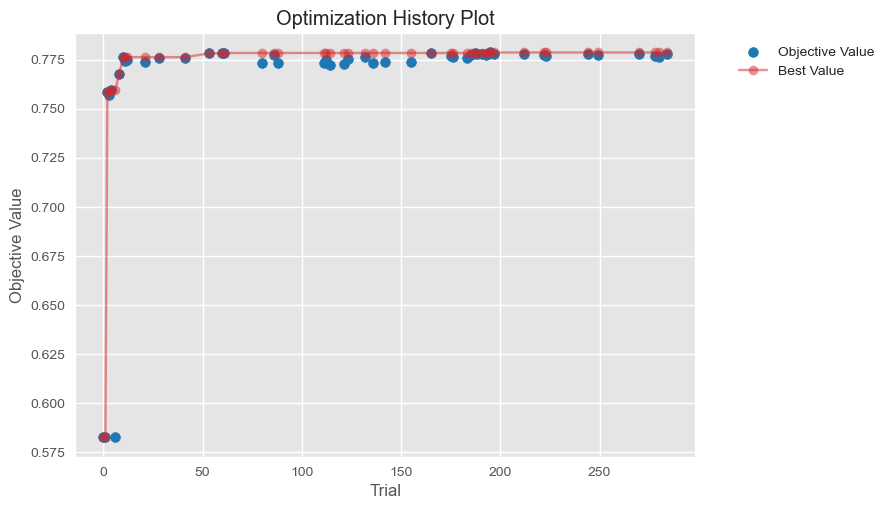

In [48]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study);

In [49]:
study.best_params

{'n_estimators': 300,
 'learning_rate': 0.27848929390971394,
 'max_depth': 11,
 'num_leaves': 11,
 'min_data_in_leaf': 1200,
 'min_child_samples': 9,
 'lambda_l1': 0.2011291529825864,
 'lambda_l2': 0.0009050850583456771,
 'min_gain_to_split': 2.2097907272512762e-05,
 'feature_fraction': 0.9597051390085163,
 'bagging_fraction': 0.8291405690356001,
 'bagging_freq': 2,
 'colsample_bytree': 0.3}

### Performance du modèle LGBMClassifier

In [50]:
# On repart de nos données déjà splitées importées au début du notebook

model_LGBM = LGBMClassifier(objective="binary",
                            verbose=0,
                            boosting_type="gbdt",
                            n_estimators=study.best_params['n_estimators'],
                            learning_rate=study.best_params['learning_rate'],
                            max_depth=study.best_params['max_depth'],
                            num_leaves=study.best_params['num_leaves'],
                            min_data_in_leaf=study.best_params['min_data_in_leaf'],
                            min_child_samples=study.best_params['min_child_samples'],
                            lambda_l1=study.best_params['lambda_l1'],
                            lambda_l2=study.best_params['lambda_l2'],
                            min_gain_to_split=study.best_params['min_gain_to_split'],
                            feature_fraction=study.best_params['feature_fraction'],
                            bagging_fraction=study.best_params['bagging_fraction'],
                            bagging_freq=study.best_params['bagging_freq'],
                            colsample_bytree=study.best_params['colsample_bytree'],
                            random_state=101,
                            n_jobs=-2,)

model_LGBM_fit = model_LGBM.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9597051390085163, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.9597051390085163
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] min_gain_to_split is set=2.2097907272512762e-05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.2097907272512762e-05
[LightGBM] [Warning] bagging_fraction is set=0.8291405690356001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8291405690356001
[LightGBM] [Warning] lambda_l1 is set=0.2011291529825864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2011291529825864
[LightGBM] [Warning] lambda_l2 is set=0.0009050850583456771, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009050850583456771
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whit

In [51]:
# Sauvegarde du modèle
import pickle

pickle.dump(model_LGBM, open('./model_LGBM.pkl', 'wb'))

L'importance des caractéristiques fait partie intégrante du développement du modèle. Il met en évidence les caractéristiques passées dans un modèle qui ont un degré d'impact plus élevé pour générer une prédiction plutôt qu'une autre. Les résultats de l'identification des caractéristiques importantes peuvent alimenter directement les tests de modèles et l'explicabilité des modèles.

In [52]:
# importance des variables
coef_imp_feature = pd.DataFrame({'variable': X_train.columns,
                                 'coef': model_LGBM.feature_importances_})
print(coef_imp_feature.sort_values(by='coef', ascending=False))

                                             variable  coef
0                              nb_equipement_securite   169
42  catégorie_véhicule_véhicule_léger_utilitaire_seul   160
45                             choc_initial_Oui_avant   136
44                obstacle_mobile_heurté_Oui_véhicule   110
1                            place_occupée_conducteur   108
5                          trajet_trajet_professionel   105
21        type_collision_Deux véhicules – par le coté    96
3                                          sexe_homme    96
31                               region_Île_de_France    95
6                                           secu2_non    93
46  manoeuvre_principale_Sans_changement_de_direction    92
18                    localisation_Hors agglomération    90
17                              luminosite_Plein jour    89
33                  sens_circulation_bidirectionnelle    87
19                     intersection_Hors intersection    85
39                      vitesse_maximale

In [53]:
# Make predictions
y_pred_lgbm = model_LGBM_fit.predict(X_test)

y_pred_lgbm_proba = model_LGBM_fit.predict_proba(X_test)

In [54]:
y_pred_lgbm_df = pd.DataFrame(y_pred_lgbm, columns=[y_test])

In [55]:
print("Prédictions sur l'ensemble de test")
print(pd.DataFrame({
    "COUNT": y_pred_lgbm_df.value_counts(),
    "RATIO": y_pred_lgbm_df.value_counts() / len(y_pred_lgbm_df) * 100}))

Prédictions sur l'ensemble de test
                     COUNT  RATIO
(gravite_accident,)              
1                    65410  60.01
0                    43591  39.99


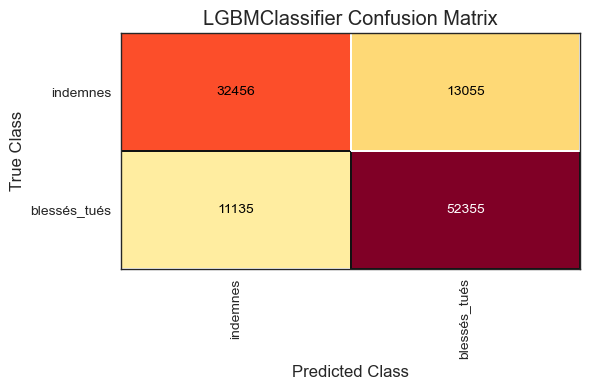

<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
from yellowbrick.classifier import ConfusionMatrix

classes = ['indemnes', 'blessés_tués']

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

cm = ConfusionMatrix(model_LGBM_fit, classes=classes)

cm.fit(X_train, y_train)        # Fit the visualizer and the model
cm.score(X_test, y_test)        # Evaluate the model on the test data
cm.show()

In [57]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     45511
           1       0.80      0.82      0.81     63490

    accuracy                           0.78    109001
   macro avg       0.77      0.77      0.77    109001
weighted avg       0.78      0.78      0.78    109001



In [58]:
print(f"Train Accuracy : {accuracy_score(y_train, model_LGBM_fit.predict(X_train)):.2%}")
print(f"Test Accuracy : {accuracy_score(y_test, y_pred_lgbm):.2%}")

Train Accuracy : 78.23%
Test Accuracy : 77.81%


In [59]:
print(f"Train Precision : {precision_score(y_train, model_LGBM_fit.predict(X_train)):.2%}")
print(f"Test Precision : {precision_score(y_test, y_pred_lgbm):.2%}")

Train Precision : 80.43%
Test Precision : 80.04%


In [60]:
print(f"Train Recall : {recall_score(y_train, model_LGBM_fit.predict(X_train)):.2%}")
print(f"Test Reccall : {recall_score(y_test, y_pred_lgbm):.2%}")

Train Recall : 82.77%
Test Reccall : 82.46%


In [61]:
print(f"Train f1_score : {f1_score(y_train, model_LGBM_fit.predict(X_train)):.2%}")
print(f"Test f1_score : {f1_score(y_test, y_pred_lgbm):.2%}")

Train f1_score : 81.58%
Test f1_score : 81.23%


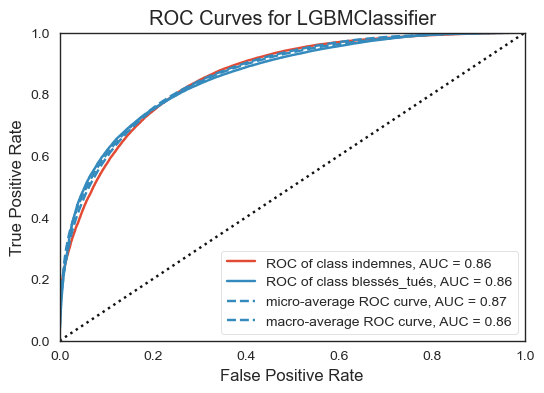

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
from yellowbrick.classifier import ROCAUC

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

vis_rocauc = ROCAUC(model_LGBM_fit, classes=classes, random_state=101)

vis_rocauc.fit(X_train, y_train)        
vis_rocauc.score(X_test, y_test)
vis_rocauc.show() 